#IMPORT LIBRARIES

In [1]:
!pip install category_encoders

In [2]:
import plotly

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import seaborn as sns

from imblearn.over_sampling import SMOTE

import statsmodels.api as sm #Library untuk melakukan pemodelan statistik
import statsmodels.formula.api as smf #Fungsi tambahan untuk menggunakan statsmodel seperti R

from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go

from sklearn.neighbors import KNeighborsRegressor

#IMPORT DATA

In [4]:
app_train = pd.read_csv("application_train.csv", sep =",")
app_test = pd.read_csv("application_test.csv", sep=",")
bureau = pd.read_csv("bureau.csv", sep=",")
b_balance = pd.read_csv("bureau_balance.csv", sep=",")
cc_balance = pd.read_csv("credit_card_balance.csv", sep=",")
ins_pay = pd.read_csv("installments_payments.csv", sep=",")
pc_balance = pd.read_csv("POS_CASH_balance.csv", sep=",")
prev_app = pd.read_csv("previous_application.csv", sep=",")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:
sample_sub = pd.read_csv("sample_submission.csv", sep=",")
sample_sub.head()

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [6]:
#variable description
desc = pd.read_csv("HomeCredit_columns_description.csv", encoding='latin1')
desc

Unnamed: 0                         Table                           Row  \
0             1  application_{train|test}.csv                    SK_ID_CURR   
1             2  application_{train|test}.csv                        TARGET   
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                   CODE_GENDER   
4             7  application_{train|test}.csv                  FLAG_OWN_CAR   
5             8  application_{train|test}.csv               FLAG_OWN_REALTY   
6             9  application_{train|test}.csv                  CNT_CHILDREN   
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL   
8            11  application_{train|test}.csv                    AMT_CREDIT   
9            12  application_{train|test}.csv                   AMT_ANNUITY   
10           13  application_{train|test}.csv               AMT_GOODS_PRICE   
11           14  application_{train|test}.csv               NAME_TYPE_SUITE   
12           15  application_{train|test}.csv              NAME_INCOME_TYPE   
13           16  application_{train|test}.csv           NAME_EDUCATION_TYPE   
14           17  application_{train|test}.csv            NAME_FAMILY_STATUS   
15           18  application_{train|test}.csv             NAME_HOUSING_TYPE   
16           19  application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17           20  application_{train|test}.csv                    DAYS_BIRTH   
18           21  application_{train|test}.csv                 DAYS_EMPLOYED   
19           22  application_{train|test}.csv             DAYS_REGISTRATION   
20           23  application_{train|test}.csv               DAYS_ID_PUBLISH   
21           24  application_{train|test}.csv                   OWN_CAR_AGE   
22           25  application_{train|test}.csv                    FLAG_MOBIL   
23           26  application_{train|test}.csv                FLAG_EMP_PHONE   
24           27  application_{train|test}.csv               FLAG_WORK_PHONE   
25           28  application_{train|test}.csv              FLAG_CONT_MOBILE   
26           29  application_{train|test}.csv                    FLAG_PHONE   
27           30  application_{train|test}.csv                    FLAG_EMAIL   
28           31  application_{train|test}.csv               OCCUPATION_TYPE   
29           32  application_{train|test}.csv               CNT_FAM_MEMBERS   
30           33  application_{train|test}.csv          REGION_RATING_CLIENT   
31           34  application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32           35  application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33           36  application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34           37  application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35           38  application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36           39  application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37           40  application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38           41  application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39           42  application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40           43  application_{train|test}.csv             ORGANIZATION_TYPE   
41           44  application_{train|test}.csv                  EXT_SOURCE_1   
42           45  application_{train|test}.csv                  EXT_SOURCE_2   
43           46  application_{train|test}.csv                  EXT_SOURCE_3   
44           47  application_{train|test}.csv                APARTMENTS_AVG   
45           48  application_{train|test}.csv              BASEMENTAREA_AVG   
46           49  application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47           50  application_{train|test}.csv               YEARS_BUILD_AVG   
48           51  application_{train|test}.csv                COMMONAREA_AVG   
49           52  application_{train|test}.csv          

In [7]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [9]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [10]:
b_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [11]:
b_balance['SK_ID_BUREAU'].unique()

array([5715448, 5715449, 5715451, ..., 5041172, 5041332, 5041336],
      dtype=int64)

In [12]:
cc_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [13]:
ins_pay.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [14]:
pc_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [15]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [16]:
app_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [17]:
app_train.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [18]:
app_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [19]:
app_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [20]:
pay_diff = app_train.loc[app_train['TARGET']==1]
pay_diff.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120          NaN           1               1                0   
26            -1827          NaN           1               1                0   
40            -1029          NaN           1               1                0   
42            -4409          NaN           1               1                1   
81            -4199          NaN           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
2

In [21]:
pay_diff['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

In [22]:
cash_loan_diff = pay_diff.loc[pay_diff['NAME_CONTRACT_TYPE']=="Cash loans"]
cash_loan = app_train.loc[app_train['NAME_CONTRACT_TYPE']=="Cash loans"]
perc_cash_loans = (len(cash_loan_diff) / len(cash_loan)) * 100
perc_cash_loans

8.345912763449208

In [23]:
rev_loan_diff = pay_diff.loc[pay_diff['NAME_CONTRACT_TYPE']=="Revolving loans"]
rev_loan = app_train.loc[app_train['NAME_CONTRACT_TYPE']=="Revolving loans"]
perc_rev_loans = (len(rev_loan_diff) / len(rev_loan)) * 100
perc_rev_loans

5.478329177909082

Didapat bahwa persentase orang dengan tipe pinjaman "Cash loans" yang kesulitan membayar kembali lebih besar daripada persentase orang dengan tipe pinjaman "Revolving loans" yang kesulitan membayar kembali.

In [24]:
cash_loan_diff.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120          NaN           1               1                0   
26            -1827          NaN           1               1                0   
40            -1029          NaN           1               1                0   
42            -4409          NaN           1               1                1   
81            -4199          NaN           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
2

In [90]:
cash_loan_diff.loc[cash_loan_diff['AMT_INCOME_TOTAL'] > cash_loan_diff['AMT_CREDIT']]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
534         100616       1         Cash loans           M            Y   
707         100816       1         Cash loans           F            N   
930         101073       1         Cash loans           F            Y   
946         101093       1         Cash loans           F            N   
1060        101231       1         Cash loans           M            Y   
1376        101617       1         Cash loans           F            N   
1731        102025       1         Cash loans           M            N   
1924        102255       1         Cash loans           F            N   
2087        102451       1         Cash loans           F            N   
2119        102491       1         Cash loans           M            Y   
2181        102559       1         Cash loans           F            N   
2290        102681       1         Cash loans           M            Y   
2430        102835       1         Cash loans           M            Y   
2494        102909       1         Cash loans           M            Y   
2537        102959       1         Cash loans           F            N   
2722        103177       1         Cash loans           M            Y   
2755        103214       1         Cash loans           F            N   
2836        103310       1         Cash loans           F            N   
2961        103454       1         Cash loans           F            Y   
3326        103889       1         Cash loans           M            N   
5066        105921       1         Cash loans           M            N   
5703        106669       1         Cash loans           M            Y   
5836        106831       1         Cash loans           M            Y   
5967        106989       1         Cash loans           M            N   
6130        107165       1         Cash loans           M            N   
6969        108117       1         Cash loans           M            Y   
7326        108536       1         Cash loans           F            N   
7467        108707       1         Cash loans           F            N   
7739        109028       1         Cash loans           F            Y   
8234        109600       1         Cash loans           M            N   
8260        109628       1         Cash loans           F            Y   
8954        110421       1         Cash loans           M            N   
9065        110540       1         Cash loans           M            N   
9297        110811       1         Cash loans           M            Y   
9487        111029       1         Cash loans           F            N   
10006       111640       1         Cash loans           M            N   
10492       112219       1         Cash loans           F            N   
10570       112314       1         Cash loans           M            N   
10940       112734       1         Cash loans           M            Y   
11520       113425       1         Cash loans           M            Y   
12267       114305       1         Cash loans           F            N   
12302       114345       1         Cash loans           M            Y   
12840       114967       1         Cash loans           F            N   
13409       115634       1         Cash loans           M            N   
13780       116060       1         Cash loans           M            N   
13905       116211       1         Cash loans           F            N   
15187       117732       1         Cash loans           M            Y   
15270       117829       1         Cash loans           F            N   
15515       118108       1         Cash loans           M            N   
15682       118298       1         Cash loans           M            N   
15794       118433       1         Cash loans           M            N   
16086       118764       1         Cash loans           M            N   
16287       118994       1         Cash loans           F            N   
16627       

In [25]:
cash_loan_diff['OCCUPATION_TYPE'].value_counts()

Laborers                 5489
Sales staff              2833
Drivers                  2002
Core staff               1609
Managers                 1241
Security staff            684
High skill tech staff     643
Cooking staff             577
Medicine staff            530
Accountants               434
Cleaning staff            409
Low-skill Laborers        344
Private service staff     158
Waiters/barmen staff      137
Secretaries                84
Realty agents              55
HR staff                   33
IT staff                   33
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
cash_loan_diff.describe()

SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   23221.000000  23221.0  23221.000000      2.322100e+04  2.322100e+04   
mean   277374.019250      1.0      0.460876      1.673538e+05  5.785988e+05   
std    102480.575622      0.0      0.756531      7.717064e+05  3.468612e+05   
min    100002.000000      1.0      0.000000      2.565000e+04  4.500000e+04   
25%    189375.000000      1.0      0.000000      1.125000e+05  3.127680e+05   
50%    276141.000000      1.0      0.000000      1.440000e+05  5.212800e+05   
75%    366026.000000      1.0      1.000000      2.025000e+05  7.551900e+05   
max    456254.000000      1.0     11.000000      1.170000e+08  4.027680e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   23221.000000     2.322100e+04                23221.000000   
mean    27425.554541     5.047565e+05                    0.019134   
std     12195.467365     3.139079e+05                    0.011942   
min      2722.500000     4.500000e+04                    0.000533   
25%     18684.000000     2.520000e+05                    0.009630   
50%     26086.500000     4.500000e+05                    0.018634   
75%     33903.000000     6.750000e+05                    0.025164   
max    149211.000000     3.600000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  23221.000000   23221.000000       23221.000000     23221.000000   
mean  -14972.853021   43212.580251       -4499.376383     -2762.669696   
std     4167.687380  120467.048018        3309.625624      1510.590425   
min   -25168.000000  -16069.000000      -22928.000000     -6207.000000   
25%   -18125.000000   -2195.000000       -6660.000000     -4135.000000   
50%   -14358.000000   -1049.000000       -4066.000000     -2839.000000   
75%   -11490.000000    -381.000000       -1673.000000     -1443.000000   
max    -7680.000000  365243.000000           0.000000         0.000000   

       OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  7107.000000     23221.0    23221.000000     23221.000000   
mean     13.534403         1.0        0.877223         0.239137   
std      12.092955         0.0        0.328188         0.426566   
min       0.000000         1.0        0.000000         0.000000   
25%       6.000000         1.0        1.000000         0.000000   
50%      11.000000         1.0        1.000000         0.000000   
75%      17.000000         1.0        1.000000         0.000000   
max      91.000000         1.0        1.000000         1.000000   

       FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  \
count      23221.000000  23221.000000  23221.000000     23221.000000   
mean           0.999440      0.244994      0.056501         2.181517   
std            0.023655      0.430093      0.230891         0.949271   
min            0.000000      0.000000      0.000000         1.000000   
25%            1.000000      0.000000      0.000000         2.000000   
50%            1.000000      0.000000      0.000000         2.000000   
75%            1.000000      0.000000      0.000000         3.000000   
max            1.000000      1.000000      1.000000        13.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          23221.000000                 23221.000000   
mean               2.155377                     2.136428   
std                0.506181                     0.500895   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             23221.000000                23221.000000   
mean                 11.781017                    0.016967   
std                   3.29128

In [27]:
bin_data = cash_loan_diff[['AMT_CREDIT']]
bin_data['AMT_CREDIT_BIN'] = pd.cut(cash_loan_diff['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],
                              labels=['Below 100k', '100k - 500k', '500k - 1mil',
                                      '1mil - 3mil', '3mil - 5mil'])
bin_data.head()

<ipython-input-27-0d6a5c859cc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['AMT_CREDIT_BIN'] = pd.cut(cash_loan_diff['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],


AMT_CREDIT AMT_CREDIT_BIN
0     406597.5    100k - 500k
26    979992.0    500k - 1mil
40   1193580.0    1mil - 3mil
42    288873.0    100k - 500k
81    252000.0    100k - 500k

In [28]:
bin_data['AMT_CREDIT_BIN'].value_counts()

100k - 500k    10755
500k - 1mil     9206
1mil - 3mil     2927
Below 100k       331
3mil - 5mil        2
Name: AMT_CREDIT_BIN, dtype: int64

In [29]:
bin_data_cash_loan = cash_loan[['AMT_CREDIT']]
bin_data_cash_loan['AMT_CREDIT_BIN'] = pd.cut(cash_loan['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],
                              labels=['Below 100k', '100k - 500k', '500k - 1mil',
                                      '1mil - 3mil', '3mil - 5mil'])
bin_data_cash_loan.head()

<ipython-input-29-042940d2bb7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data_cash_loan['AMT_CREDIT_BIN'] = pd.cut(cash_loan['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],


AMT_CREDIT AMT_CREDIT_BIN
0    406597.5    100k - 500k
1   1293502.5    1mil - 3mil
3    312682.5    100k - 500k
4    513000.0    500k - 1mil
5    490495.5    100k - 500k

In [30]:
bin_data_cash_loan['AMT_CREDIT_BIN'].value_counts()

100k - 500k    117970
500k - 1mil    104980
1mil - 3mil     49246
Below 100k       6004
3mil - 5mil        32
Name: AMT_CREDIT_BIN, dtype: int64

In [31]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah kurang dari Rp 100.000
bin1 = bin_data.loc[bin_data['AMT_CREDIT_BIN']=='Below 100k']
bin1_cash_loan = bin_data_cash_loan.loc[bin_data_cash_loan['AMT_CREDIT_BIN']=='Below 100k']
perc_bin1 = (len(bin1) / len(bin1_cash_loan)) * 100
perc_bin1

5.512991339107262

In [32]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah berkisar antara Rp 100.000 - Rp 500.000
bin2 = bin_data.loc[bin_data['AMT_CREDIT_BIN']=='100k - 500k']
bin2_cash_loan = bin_data_cash_loan.loc[bin_data_cash_loan['AMT_CREDIT_BIN']=='100k - 500k']
perc_bin2 = (len(bin2) / len(bin2_cash_loan)) * 100
perc_bin2

9.11672459099771

In [33]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah berkisar antara Rp 500.000 - Rp 1.000.000
bin3 = bin_data.loc[bin_data['AMT_CREDIT_BIN']=='500k - 1mil']
bin3_cash_loan = bin_data_cash_loan.loc[bin_data_cash_loan['AMT_CREDIT_BIN']=='500k - 1mil']
perc_bin3 = (len(bin3) / len(bin3_cash_loan)) * 100
perc_bin3

8.769289388454943

In [34]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah berkisar antara Rp 1.000.000 - Rp 3.000.000
bin4 = bin_data.loc[bin_data['AMT_CREDIT_BIN']=='1mil - 3mil']
bin4_cash_loan = bin_data_cash_loan.loc[bin_data_cash_loan['AMT_CREDIT_BIN']=='1mil - 3mil']
perc_bin4 = (len(bin4) / len(bin4_cash_loan)) * 100
perc_bin4

5.9436299394874705

In [35]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah berkisar antara Rp 3.000.000 - Rp 5.000.000
bin5 = bin_data.loc[bin_data['AMT_CREDIT_BIN']=='3mil - 5mil']
bin5_cash_loan = bin_data_cash_loan.loc[bin_data_cash_loan['AMT_CREDIT_BIN']=='3mil - 5mil']
perc_bin5 = (len(bin5) / len(bin5_cash_loan)) * 100
perc_bin5

6.25

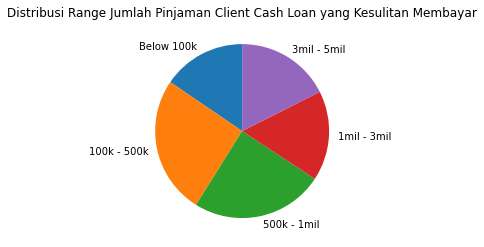

In [36]:
#Pie Chart Cash Loan
cash_diff_train = np.array([5.51, 9.12, 8.77, 5.94, 6.25])
mylabels = ["Below 100k","100k - 500k", "500k - 1mil", "1mil - 3mil", "3mil - 5mil"]

plt.title("Distribusi Range Jumlah Pinjaman Client Cash Loan yang Kesulitan Membayar")
plt.pie(cash_diff_train, labels = mylabels, startangle = 90)
plt.show() 

#MODEL MACHINE LEARNING

In [37]:
app_train1 = app_train[:100000]
#app_train2 = app_train[100001:200000]
#app_train3 = app_train[200000:]

In [38]:
app_train1.isna().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         7
AMT_GOODS_PRICE                    81
NAME_TYPE_SUITE                   405
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     66019
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [39]:
app_test.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [40]:
app_train1 = app_train1.dropna()

In [41]:
app_test = app_test.fillna(0)

In [69]:
#app_train2 = app_train2.dropna()

In [70]:
#app_train3 = app_train3.dropna()

In [42]:
app_train1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
71       100083       0         Cash loans           M            Y   
124      100145       0         Cash loans           F            Y   
152      100179       0         Cash loans           F            Y   
161      100190       0         Cash loans           M            Y   
255      100295       1         Cash loans           M            Y   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
71                Y             0          103500.0    573628.5      24435.0   
124               Y             1          202500.0    260725.5      16789.5   
152               N             0          202500.0    675000.0      53329.5   
161               N             0          162000.0    263686.5      24781.5   
255               N             1          225000.0   1019205.0      31032.0   

     AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
71          463500.0   Unaccompanied               Working   
124         198000.0          Family               Working   
152         675000.0   Unaccompanied  Commercial associate   
161         238500.0   Unaccompanied  Commercial associate   
255         774000.0   Unaccompanied  Commercial associate   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
71   Secondary / secondary special               Married  House / apartment   
124  Secondary / secondary special             Separated  House / apartment   
152               Higher education               Married  House / apartment   
161               Higher education               Married  House / apartment   
255  Secondary / secondary special  Single / not married  House / apartment   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
71                     0.009657      -15406           -892             -341.0   
124                    0.018850      -16282          -4375             -762.0   
152                    0.031329      -11375          -2311             -180.0   
161                    0.022625      -13972          -4472             -464.0   
255                    0.072508      -11356           -602             -335.0   

     DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  \
71             -4176         22.0           1               1   
124            -1494          8.0           1               1   
152            -2009          4.0           1               1   
161            -4529          3.0           1               1   
255            -3224          9.0           1               1   

     FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
71                 0                 1           0           0   
124                0                 1           0           0   
152                0                 1           0           0   
161                0                 1           1           0   
255                0                 1           0           0   

    OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
71         Laborers              2.0                     2   
124        Laborers              2.0                     2   
152        Managers              2.0                     2   
161        Laborers              2.0                     2   
255        Laborers              2.0                     1   

     REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
71                             2                     MONDAY   
124                            2                    TUESDAY   
152                            2                     MONDAY   
161                            2                   THURSDAY   
255                            1                     MONDAY   

     HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
71                        18                           0   
124                       11                           0   
152                       13              

In [43]:
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2               0          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          0.0   
1      -18064          -4469            -9118.0            -1623          0.0   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          0.0   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                   0              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                   0              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [44]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2806 entries, 71 to 99985
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 2.6+ MB


In [45]:
encoder = ce.OrdinalEncoder()
app_train1 = encoder.fit_transform(app_train1)
app_train1.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
71       100083       0                   1            1             1   
124      100145       0                   1            2             1   
152      100179       0                   1            2             1   
161      100190       0                   1            1             1   
255      100295       1                   1            1             1   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
71                 1             0          103500.0    573628.5      24435.0   
124                1             1          202500.0    260725.5      16789.5   
152                2             0          202500.0    675000.0      53329.5   
161                2             0          162000.0    263686.5      24781.5   
255                2             1          225000.0   1019205.0      31032.0   

     AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
71          463500.0                1                 1                    1   
124         198000.0                2                 1                    1   
152         675000.0                1                 2                    2   
161         238500.0                1                 2                    2   
255         774000.0                1                 2                    1   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
71                    1                  1                    0.009657   
124                   2                  1                    0.018850   
152                   1                  1                    0.031329   
161                   1                  1                    0.022625   
255                   3                  1                    0.072508   

     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
71       -15406           -892             -341.0            -4176   
124      -16282          -4375             -762.0            -1494   
152      -11375          -2311             -180.0            -2009   
161      -13972          -4472             -464.0            -4529   
255      -11356           -602             -335.0            -3224   

     OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
71          22.0           1               1                0   
124          8.0           1               1                0   
152          4.0           1               1                0   
161          3.0           1               1                0   
255          9.0           1               1                0   

     FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
71                  1           0           0                1   
124                 1           0           0                1   
152                 1           0           0                2   
161                 1           1           0                1   
255                 1           0           0                1   

     CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
71               2.0                     2                            2   
124              2.0                     2                            2   
152              2.0                     2                            2   
161              2.0                     2                            2   
255              2.0                     1                            1   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
71                            1                       18   
124                           2                       11   
152                           1                       13   
161                           3                       16   
255                           1                       14   

     REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
71                            0                           0   


In [46]:
app_test = encoder.fit_transform(app_test)
app_test.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   1            1             1                1   
1      100005                   1            2             1                1   
2      100013                   1            2             2                1   
3      100028                   1            1             1                1   
4      100038                   1            2             2                2   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                1                 1                    1                   1   
1                1                 1                    2                   1   
2                2                 1                    1                   1   
3                1                 1                    2                   1   
4                1                 1                    2                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.018850      -19241          -2329   
1                  1                    0.035792      -18064          -4469   
2                  1                    0.019101      -20038          -4458   
3                  1                    0.026392      -13976          -1866   
4                  1                    0.010032      -13040          -2191   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -5170.0             -812          0.0           1   
1            -9118.0            -1623          0.0           1   
2            -2175.0            -3503          5.0           1   
3            -2000.0            -4208          0.0           1   
4            -4000.0            -4262         16.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           0           1   
1               1                0                 1           0           0   
2               1                0                 1           0           0   
3               1                0                 1           1           0   
4               1                1                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1              2.0                     2   
1                2              2.0                     2   
2                3              2.0                     2   
3                4              4.0                     2   
4                1              3.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           1   
1                            2                           2   
2                            2                           3   
3                            2                           4   
4                            2                           2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

In [47]:
app_train1.describe()

SK_ID_CURR       TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  \
count    2806.000000  2806.000000         2806.000000  2806.000000   
mean   158742.005702     0.059159            1.106914     1.489309   
std     33261.470604     0.235964            0.309059     0.499975   
min    100083.000000     0.000000            1.000000     1.000000   
25%    130365.500000     0.000000            1.000000     1.000000   
50%    158386.000000     0.000000            1.000000     1.000000   
75%    187288.750000     0.000000            1.000000     2.000000   
max    216076.000000     1.000000            2.000000     2.000000   

       FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        2806.0      2806.000000   2806.000000      2.806000e+03   
mean            1.0         1.306130      0.593015      2.255478e+05   
std             0.0         0.460966      0.775568      1.331357e+05   
min             1.0         1.000000      0.000000      4.050000e+04   
25%             1.0         1.000000      0.000000      1.350000e+05   
50%             1.0         1.000000      0.000000      2.025000e+05   
75%             1.0         2.000000      1.000000      2.700000e+05   
max             1.0         2.000000      5.000000      2.025000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
count  2.806000e+03    2806.000000     2.806000e+03      2806.000000   
mean   7.118878e+05   32243.885602     6.469873e+05         1.235923   
std    4.623114e+05   17041.911536     4.294594e+05         0.657825   
min    4.500000e+04    4324.500000     4.500000e+04         1.000000   
25%    3.210851e+05   20311.875000     2.700000e+05         1.000000   
50%    5.997780e+05   29943.000000     5.175000e+05         1.000000   
75%    1.002870e+06   40687.875000     9.000000e+05         1.000000   
max    2.931660e+06  213291.000000     2.700000e+06         7.000000   

       NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
count       2806.000000          2806.000000         2806.000000   
mean           1.506771             1.524590            1.720599   
std            0.645116             0.615835            1.272631   
min            1.000000             1.000000            1.000000   
25%            1.000000             1.000000            1.000000   
50%            1.000000             1.000000            1.000000   
75%            2.000000             2.000000            2.000000   
max            3.000000             5.000000            5.000000   

       NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
count        2806.000000                 2806.000000   2806.000000   
mean            1.230934                    0.023498 -14251.804348   
std             0.793996                    0.016504   3318.206071   
min             1.000000                    0.001276 -24835.000000   
25%             1.000000                    0.010500 -16398.750000   
50%             1.000000                    0.020246 -13927.000000   
75%             1.000000                    0.030755 -11686.750000   
max             6.000000                    0.072508  -7715.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count    2806.000000        2806.000000      2806.000000  2806.000000   
mean    -2274.068068       -4272.735923     -3016.401283    11.167498   
std      2055.757059        3061.181598      1505.635528    12.145454   
min    -14375.000000      -15818.000000     -6265.000000     0.000000   
25%     -3112.250000       -6565.500000     -4297.000000     4.000000   
50%     -1659.000000       -4014.000000     -3281.500000     8.000000   
75%      -808.000000       -1441.750000     -1736.000000    14.000000   
max        -4.000000          -1.000000        -2.000000    65.000000   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count      2806.0     2806.000000      2806.000000       2806.000000   
mean          1.0        0.999644  

#CONTOH SALAH SATU CLIENT HOME CREDIT INDONESIA PADA DATA application_train.csv

In [48]:
app_train1.loc[app_train1['SK_ID_CURR']==100295]

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
255      100295       1                   1            1             1   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
255                2             1          225000.0   1019205.0      31032.0   

     AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
255         774000.0                1                 2                    1   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
255                   3                  1                    0.072508   

     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
255      -11356           -602             -335.0            -3224   

     OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
255          9.0           1               1                0   

     FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
255                 1           0           0                1   

     CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
255              2.0                     1                            1   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
255                           1                       14   

     REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
255                           1                           0   

     LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
255                            1                       0   

     REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
255                       0                        0                  1   

     EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
255      0.262005      0.302394      0.463275          0.2402   

     BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  \
255            0.1098                       0.9916           0.8844   

     COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  \
255          0.4682            0.4         0.1724         0.5417   

     FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
255            0.5        0.0223                0.1942           0.227   

     NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
255                   0.0077             0.0075           0.2447   

     BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
255             0.1139                        0.9916            0.8889   

     COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
255           0.4724          0.4028          0.1724          0.5417   

     FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
255             0.5         0.0228                 0.2121           0.2365   

     NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
255                    0.0078               0.008           0.2425   

     BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
255             0.1098                        0.9916            0.8859   

     COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  \
255           0.4711             0.4          0.1724          0.5417   

     FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
255             0.5         0.0227                 0.1975            0.231   

     NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  FONDKAPREMONT_MODE  \
255                    0.0078              0.0077                   1   

     HOUSETYPE_MODE  TOTALAREA_MODE  WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  \
255               1          0.1874                   2                    1   

     OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
255                       3.0                       0.0   

     OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
255                       3.0                       0.0   

     DAYS_LAST_PHONE_

In [46]:
bureau.loc[bureau['SK_ID_CURR']==100295]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1088403      100295       6193806        Closed      currency 1          -53   
1162936      100295       6193807        Closed      currency 1          -87   
1162937      100295       6193808        Closed      currency 1          -95   
1162938      100295       6193809        Closed      currency 1        -2810   
1162939      100295       6193810        Active      currency 1         -607   
1162940      100295       6193811        Closed      currency 1        -1148   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1088403                   0                -24.0              -39.0   
1162936                   0                -62.0              -70.0   
1162937                   0                -85.0              -89.0   
1162938                   0              -1134.0            -1120.0   
1162939                   0               1219.0                NaN   
1162940                   0                  NaN             -556.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1088403                     NaN                   0         36000.0   
1162936                     NaN                   0         40500.0   
1162937                     NaN                   0         36000.0   
1162938                     NaN                   0        720000.0   
1162939                     NaN                   0        778500.0   
1162940                     0.0                   0         27000.0   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1088403                  0.0                   0.0                     0.0   
1162936                  0.0                   0.0                     0.0   
1162937                  0.0                   0.0                     0.0   
1162938                  0.0                   0.0                     0.0   
1162939             647032.5                   0.0                     0.0   
1162940                  0.0                   0.0                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
1088403  Consumer credit                 -23          NaN  
1162936  Consumer credit                 -54          NaN  
1162937  Consumer credit                 -74          NaN  
1162938  Consumer credit                -803          NaN  
1162939  Consumer credit                 -54          NaN  
1162940      Credit card                -554          NaN

In [49]:
b_balance.loc[b_balance['SK_ID_BUREAU']==6193809]

Empty DataFrame
Columns: [SK_ID_BUREAU, MONTHS_BALANCE, STATUS]
Index: []

In [50]:
pc_balance.loc[pc_balance['SK_ID_CURR']==100295]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, CNT_INSTALMENT, CNT_INSTALMENT_FUTURE, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF]
Index: []

In [51]:
cc_balance.loc[cc_balance['SK_ID_CURR']==100295]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_INST_MIN_REGULARITY, AMT_PAYMENT_CURRENT, AMT_PAYMENT_TOTAL_CURRENT, AMT_RECEIVABLE_PRINCIPAL, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE, CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, CNT_INSTALMENT_MATURE_CUM, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF]
Index: []

In [52]:
prev_app.loc[prev_app['SK_ID_CURR']==100295]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL]
Index: []

In [53]:
ins_pay.loc[ins_pay['SK_ID_CURR']==100295]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NUM_INSTALMENT_VERSION, NUM_INSTALMENT_NUMBER, DAYS_INSTALMENT, DAYS_ENTRY_PAYMENT, AMT_INSTALMENT, AMT_PAYMENT]
Index: []

Dalam hal ini hanya akan digunakan data application_train.csv dan bureau.csv sebagai training datasets. Hal ini dikarenakan ingin melihat keterkaitan antara application pada kreditur lain dan application pada Home Credit Indonesia.

In [49]:
merged = pd.merge(bureau, app_train1, on='SK_ID_CURR', how='inner')
merged.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      189495       5715337        Closed      currency 1         -756   
1      189495       5715338        Closed      currency 1        -1152   
2      189495       5715339        Active      currency 1         -128   
3      189495       5715340        Active      currency 1         -562   
4      189495       5715336        Closed      currency 1         -372   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0                705.0              -87.0   
1                   0                309.0             -754.0   
2                   0               1698.0                NaN   
3                   0              27481.0                NaN   
4                   0                -69.0              -98.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0       3150000.0   
1                     NaN                   0       2115000.0   
2                     NaN                   0       3638817.0   
3               15406.065                   1        180000.0   
4                     NaN                   0        134550.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                0.000                  0.00                     0.0   
1                0.000                  0.00                     0.0   
2          3566304.000                  0.00                     0.0   
3            50238.405             124655.67                     0.0   
4                0.000                  0.00                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY_x  TARGET  \
0  Consumer credit                 -38            NaN       0   
1  Consumer credit                -580            NaN       0   
2  Consumer credit                 -38            NaN       0   
3      Credit card                 -45            NaN       0   
4  Consumer credit                 -97            NaN       0   

   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   1            1             1                1   
1                   1            1             1                1   
2                   1            1             1                1   
3                   1            1             1                1   
4                   1            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_y  AMT_GOODS_PRICE  \
0             0          382500.0   1185282.0        34785.0        1035000.0   
1             0          382500.0   1185282.0        34785.0        1035000.0   
2             0          382500.0   1185282.0        34785.0        1035000.0   
3             0          382500.0   1185282.0        34785.0        1035000.0   
4             0          382500.0   1185282.0        34785.0        1035000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                1                 3                    1                   3   
1                1                 3                    1                   3   
2                1                 3                    1                   3   
3                1                 3                    1                   3   
4                1                 3                    1                   3   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.006233       -9589          -1831   
1                  1                    0.006233       -9589          -1831   
2                  1                    0.006233       -9589          -1831   
3                  1                    0.006233       -9589          -1831   
4                  1                    0.006233       -9589          -1831   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0             -551.0  

In [50]:
merged_test = pd.merge(bureau, app_test, on='SK_ID_CURR', how='right')
merged_test.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      261883     5718424.0        Active      currency 1       -326.0   
1      261883     5718426.0        Closed      currency 1      -1039.0   
2      261883     5718427.0        Closed      currency 1       -702.0   
3      261883     5718428.0        Closed      currency 1       -378.0   
4      261883     5718429.0        Closed      currency 1       -671.0   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                 0.0               -142.0                NaN   
1                 0.0               -769.0             -769.0   
2                 0.0                 28.0             -671.0   
3                 0.0               -144.0             -144.0   
4                 0.0               -343.0             -343.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                 0.0      160047.450   
1                     NaN                 0.0       56515.500   
2                     NaN                 0.0      141840.000   
3                     0.0                 0.0           0.000   
4                     0.0                 0.0      134951.175   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0            160047.45                   NaN                     0.0   
1                 0.00                   NaN                     0.0   
2                 0.00                   NaN                     0.0   
3                 0.00                   0.0                     0.0   
4                 0.00                   0.0                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY_x  NAME_CONTRACT_TYPE  \
0  Consumer credit                -4.0            NaN                   1   
1  Consumer credit              -761.0            0.0                   1   
2  Consumer credit              -659.0            0.0                   1   
3      Credit card              -144.0            NaN                   1   
4  Consumer credit              -337.0            NaN                   1   

   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             1                1             2          261000.0   
1            1             1                1             2          261000.0   
2            1             1                1             2          261000.0   
3            1             1                1             2          261000.0   
4            1             1                1             2          261000.0   

   AMT_CREDIT  AMT_ANNUITY_y  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
0    855463.5        54801.0         747000.0                2   
1    855463.5        54801.0         747000.0                2   
2    855463.5        54801.0         747000.0                2   
3    855463.5        54801.0         747000.0                2   
4    855463.5        54801.0         747000.0                2   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 4                    2                   1   
1                 4                    2                   1   
2                 4                    2                   1   
3                 4                    2                   1   
4                 4                    2                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.008625      -14085          -1230   
1                  1                    0.008625      -14085          -1230   
2                  1                    0.008625      -14085          -1230   
3                  1                    0.008625      -14085          -1230   
4                  1                    0.008625      -14085          -1230   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -1045.0            -1056          0.0           1   
1   

In [51]:
merged_test_enc = encoder.fit_transform(merged_test)
merged_test_enc.head()

SK_ID_CURR  SK_ID_BUREAU  CREDIT_ACTIVE  CREDIT_CURRENCY  DAYS_CREDIT  \
0      261883     5718424.0              1                1       -326.0   
1      261883     5718426.0              2                1      -1039.0   
2      261883     5718427.0              2                1       -702.0   
3      261883     5718428.0              2                1       -378.0   
4      261883     5718429.0              2                1       -671.0   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                 0.0               -142.0                NaN   
1                 0.0               -769.0             -769.0   
2                 0.0                 28.0             -671.0   
3                 0.0               -144.0             -144.0   
4                 0.0               -343.0             -343.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                 0.0      160047.450   
1                     NaN                 0.0       56515.500   
2                     NaN                 0.0      141840.000   
3                     0.0                 0.0           0.000   
4                     0.0                 0.0      134951.175   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0            160047.45                   NaN                     0.0   
1                 0.00                   NaN                     0.0   
2                 0.00                   NaN                     0.0   
3                 0.00                   0.0                     0.0   
4                 0.00                   0.0                     0.0   

   CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY_x  NAME_CONTRACT_TYPE  \
0            1                -4.0            NaN                   1   
1            1              -761.0            0.0                   1   
2            1              -659.0            0.0                   1   
3            2              -144.0            NaN                   1   
4            1              -337.0            NaN                   1   

   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             1                1             2          261000.0   
1            1             1                1             2          261000.0   
2            1             1                1             2          261000.0   
3            1             1                1             2          261000.0   
4            1             1                1             2          261000.0   

   AMT_CREDIT  AMT_ANNUITY_y  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
0    855463.5        54801.0         747000.0                2   
1    855463.5        54801.0         747000.0                2   
2    855463.5        54801.0         747000.0                2   
3    855463.5        54801.0         747000.0                2   
4    855463.5        54801.0         747000.0                2   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 4                    2                   1   
1                 4                    2                   1   
2                 4                    2                   1   
3                 4                    2                   1   
4                 4                    2                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.008625      -14085          -1230   
1                  1                    0.008625      -14085          -1230   
2                  1                    0.008625      -14085          -1230   
3                  1                    0.008625      -14085          -1230   
4                  1                    0.008625      -14085          -1230   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -1045.0            -1056          0.0           1   
1            -10

In [52]:
merged_test_enc = merged_test_enc.fillna(0)
merged_test_enc.head()

SK_ID_CURR  SK_ID_BUREAU  CREDIT_ACTIVE  CREDIT_CURRENCY  DAYS_CREDIT  \
0      261883     5718424.0              1                1       -326.0   
1      261883     5718426.0              2                1      -1039.0   
2      261883     5718427.0              2                1       -702.0   
3      261883     5718428.0              2                1       -378.0   
4      261883     5718429.0              2                1       -671.0   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                 0.0               -142.0                0.0   
1                 0.0               -769.0             -769.0   
2                 0.0                 28.0             -671.0   
3                 0.0               -144.0             -144.0   
4                 0.0               -343.0             -343.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     0.0                 0.0      160047.450   
1                     0.0                 0.0       56515.500   
2                     0.0                 0.0      141840.000   
3                     0.0                 0.0           0.000   
4                     0.0                 0.0      134951.175   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0            160047.45                   0.0                     0.0   
1                 0.00                   0.0                     0.0   
2                 0.00                   0.0                     0.0   
3                 0.00                   0.0                     0.0   
4                 0.00                   0.0                     0.0   

   CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY_x  NAME_CONTRACT_TYPE  \
0            1                -4.0            0.0                   1   
1            1              -761.0            0.0                   1   
2            1              -659.0            0.0                   1   
3            2              -144.0            0.0                   1   
4            1              -337.0            0.0                   1   

   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            1             1                1             2          261000.0   
1            1             1                1             2          261000.0   
2            1             1                1             2          261000.0   
3            1             1                1             2          261000.0   
4            1             1                1             2          261000.0   

   AMT_CREDIT  AMT_ANNUITY_y  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
0    855463.5        54801.0         747000.0                2   
1    855463.5        54801.0         747000.0                2   
2    855463.5        54801.0         747000.0                2   
3    855463.5        54801.0         747000.0                2   
4    855463.5        54801.0         747000.0                2   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 4                    2                   1   
1                 4                    2                   1   
2                 4                    2                   1   
3                 4                    2                   1   
4                 4                    2                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.008625      -14085          -1230   
1                  1                    0.008625      -14085          -1230   
2                  1                    0.008625      -14085          -1230   
3                  1                    0.008625      -14085          -1230   
4                  1                    0.008625      -14085          -1230   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -1045.0            -1056          0.0           1   
1            -10

In [53]:
merged = merged.loc[merged['CREDIT_ACTIVE']=='Active']
merged = merged.drop(columns='CREDIT_ACTIVE')
merged.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
2       189495       5715339      currency 1         -128                   0   
3       189495       5715340      currency 1         -562                   0   
16      193371       5717148      currency 1         -351                   0   
17      193371       5717149      currency 1         -865                   0   
18      193371       5717150      currency 1          -70                   0   

    DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
2                1698.0                NaN                     NaN   
3               27481.0                NaN               15406.065   
16               -139.0                NaN                   0.000   
17                418.0                NaN                     NaN   
18                115.0                NaN                     NaN   

    CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
2                    0       3638817.0          3566304.000   
3                    1        180000.0            50238.405   
16                   0         84825.0            51768.045   
17                   0         45000.0                0.000   
18                   0         38205.0            26365.500   

    AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
2                   0.00                     0.0  Consumer credit   
3              124655.67                     0.0      Credit card   
16                  0.00                     0.0  Consumer credit   
17                  0.00                     0.0      Credit card   
18                  0.00                     0.0  Consumer credit   

    DAYS_CREDIT_UPDATE  AMT_ANNUITY_x  TARGET  NAME_CONTRACT_TYPE  \
2                  -38            NaN       0                   1   
3                  -45            NaN       0                   1   
16                -155            NaN       0                   1   
17                 -52            NaN       0                   1   
18                  -7            NaN       0                   1   

    CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
2             1             1                1             0   
3             1             1                1             0   
16            1             1                1             1   
17            1             1                1             1   
18            1             1                1             1   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_y  AMT_GOODS_PRICE  \
2           382500.0   1185282.0        34785.0        1035000.0   
3           382500.0   1185282.0        34785.0        1035000.0   
16          180000.0    312768.0        16506.0         270000.0   
17          180000.0    312768.0        16506.0         270000.0   
18          180000.0    312768.0        16506.0         270000.0   

    NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
2                 1                 3                    1   
3                 1                 3                    1   
16                1                 2                    1   
17                1                 2                    1   
18                1                 2                    1   

    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
2                    3                  1                    0.006233   
3                    3                  1                    0.006233   
16                   1                  1                    0.010276   
17                   1                  1                    0.010276   
18                   1                  1                    0.010276   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
2        -9589          -1831             -551.0            -2275   
3        -9589          -1831             -551.0            -2275   
16       -9182          -1802            -4007.0            -1868   
17   

#Pisahkan antara fitur numerikal dan fitur kategorikal

#FITUR KATEGORIKAL

In [54]:
merged_cat = merged[['TARGET', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                    'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
                    'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                    'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 
                    'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
                    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                    'FLAG_DOCUMENT_21']]
merged_cat.head()

TARGET CREDIT_CURRENCY      CREDIT_TYPE  NAME_CONTRACT_TYPE  CODE_GENDER  \
2        0      currency 1  Consumer credit                   1            1   
3        0      currency 1      Credit card                   1            1   
16       0      currency 1  Consumer credit                   1            1   
17       0      currency 1      Credit card                   1            1   
18       0      currency 1  Consumer credit                   1            1   

    FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
2              1                1                1                 3   
3              1                1                1                 3   
16             1                1                1                 2   
17             1                1                1                 2   
18             1                1                1                 2   

    NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  \
2                     1                   3                  1           1   
3                     1                   3                  1           1   
16                    1                   1                  1           1   
17                    1                   1                  1           1   
18                    1                   1                  1           1   

    FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
2                1                0                 1           0           0   
3                1                0                 1           0           0   
16               1                0                 1           0           0   
17               1                0                 1           0           0   
18               1                0                 1           0           0   

    OCCUPATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
2                 2                     2                            2   
3                 2                     2                            2   
16                6                     2                            2   
17                6                     2                            2   
18                6                     2                            2   

    WEEKDAY_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
2                            1                           0   
3                            1                           0   
16                           6                           0   
17                           6                           0   
18                           6                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
2                            0                            0   
3                            0                            0   
16                           0                            0   
17                           0                            0   
18                           0                            0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
2                        0                        0                 26   
3                        0                        0                 26   
16                       0                        0                  1   
17                       0                        0                  1   
18                       0                        0                  1   

    FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
2                 0                0                0                0   
3                 0                0                0                0   
16                0                1                0                0   
17                0                1                0                0   
18                0                1                0                0   

    FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCU

#Lakukan proses encoding pada fitur kategorikal

In [55]:
merged_cat_enc = encoder.fit_transform(merged_cat)
merged_cat_enc.head()

TARGET  CREDIT_CURRENCY  CREDIT_TYPE  NAME_CONTRACT_TYPE  CODE_GENDER  \
2        0                1            1                   1            1   
3        0                1            2                   1            1   
16       0                1            1                   1            1   
17       0                1            2                   1            1   
18       0                1            1                   1            1   

    FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
2              1                1                1                 3   
3              1                1                1                 3   
16             1                1                1                 2   
17             1                1                1                 2   
18             1                1                1                 2   

    NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  \
2                     1                   3                  1           1   
3                     1                   3                  1           1   
16                    1                   1                  1           1   
17                    1                   1                  1           1   
18                    1                   1                  1           1   

    FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
2                1                0                 1           0           0   
3                1                0                 1           0           0   
16               1                0                 1           0           0   
17               1                0                 1           0           0   
18               1                0                 1           0           0   

    OCCUPATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
2                 2                     2                            2   
3                 2                     2                            2   
16                6                     2                            2   
17                6                     2                            2   
18                6                     2                            2   

    WEEKDAY_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
2                            1                           0   
3                            1                           0   
16                           6                           0   
17                           6                           0   
18                           6                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
2                            0                            0   
3                            0                            0   
16                           0                            0   
17                           0                            0   
18                           0                            0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
2                        0                        0                 26   
3                        0                        0                 26   
16                       0                        0                  1   
17                       0                        0                  1   
18                       0                        0                  1   

    FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
2                 0                0                0                0   
3                 0                0                0                0   
16                0                1                0                0   
17                0                1                0                0   
18                0                1                0                0   

    FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUM

In [56]:
merged_cat_enc.isna().sum()

TARGET                         0
CREDIT_CURRENCY                0
CREDIT_TYPE                    0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUM

In [57]:
merged_cat_enc.dtypes

TARGET                         int64
CREDIT_CURRENCY                int32
CREDIT_TYPE                    int32
NAME_CONTRACT_TYPE             int32
CODE_GENDER                    int32
FLAG_OWN_CAR                   int32
FLAG_OWN_REALTY                int32
NAME_TYPE_SUITE                int32
NAME_INCOME_TYPE               int32
NAME_EDUCATION_TYPE            int32
NAME_FAMILY_STATUS             int32
NAME_HOUSING_TYPE              int32
FLAG_MOBIL                     int64
FLAG_EMP_PHONE                 int64
FLAG_WORK_PHONE                int64
FLAG_CONT_MOBILE               int64
FLAG_PHONE                     int64
FLAG_EMAIL                     int64
OCCUPATION_TYPE                int32
REGION_RATING_CLIENT           int64
REGION_RATING_CLIENT_W_CITY    int64
WEEKDAY_APPR_PROCESS_START     int32
REG_REGION_NOT_LIVE_REGION     int64
REG_REGION_NOT_WORK_REGION     int64
LIVE_REGION_NOT_WORK_REGION    int64
REG_CITY_NOT_WORK_CITY         int64
LIVE_CITY_NOT_WORK_CITY        int64
O

In [58]:
X = merged_cat_enc.drop(columns='TARGET')
y = merged_cat_enc['TARGET']

#Feature Selection untuk fitur kategorikal

In [59]:
k_best = SelectKBest(score_func=chi2, k=10)
fit = k_best.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
featureScores.sort_values('Score', ascending=False)

Features       Score
26            ORGANIZATION_TYPE  117.948186
17              OCCUPATION_TYPE   41.776433
9            NAME_FAMILY_STATUS    9.278488
13              FLAG_WORK_PHONE    8.482694
23  LIVE_REGION_NOT_WORK_REGION    7.016205
38             FLAG_DOCUMENT_13    6.570100
24       REG_CITY_NOT_WORK_CITY    4.777431
28              FLAG_DOCUMENT_3    4.481725
8           NAME_EDUCATION_TYPE    4.219029
30              FLAG_DOCUMENT_5    3.895526
41             FLAG_DOCUMENT_16    3.878733
31              FLAG_DOCUMENT_6    2.770524
40             FLAG_DOCUMENT_15    2.295577
19  REGION_RATING_CLIENT_W_CITY    2.268696
34              FLAG_DOCUMENT_9    2.222308
25      LIVE_CITY_NOT_WORK_CITY    2.175648
43             FLAG_DOCUMENT_18    1.875127
20   WEEKDAY_APPR_PROCESS_START    1.700767
18         REGION_RATING_CLIENT    1.661493
15                   FLAG_PHONE    1.542009
2            NAME_CONTRACT_TYPE    1.403515
7              NAME_INCOME_TYPE    1.275377
45             FLAG_DOCUMENT_20    1.108210
44             FLAG_DOCUMENT_19    0.237473
32              FLAG_DOCUMENT_7    0.237473
37             FLAG_DOCUMENT_12    0.237473
10            NAME_HOUSING_TYPE    0.234427
3                   CODE_GENDER    0.227752
6               NAME_TYPE_SUITE    0.191151
39             FLAG_DOCUMENT_14    0.167733
1                   CREDIT_TYPE    0.135172
5               FLAG_OWN_REALTY    0.111409
42             FLAG_DOCUMENT_17    0.079158
33              FLAG_DOCUMENT_8    0.047926
22   REG_REGION_NOT_WORK_REGION    0.033642
21   REG_REGION_NOT_LIVE_REGION    0.025942
16                   FLAG_EMAIL    0.024110
14             FLAG_CONT_MOBILE    0.005814
36             FLAG_DOCUMENT_11    0.001599
0               CREDIT_CURRENCY    0.000299
12               FLAG_EMP_PHONE    0.000000
11                   FLAG_MOBIL    0.000000
4                  FLAG_OWN_CAR    0.000000
27              FLAG_DOCUMENT_2         NaN
29              FLAG_DOCUMENT_4         NaN
35             FLAG_DOCUMENT_10         NaN
46             FLAG_DOCUMENT_21         NaN

#FITUR NUMERIKAL

In [60]:
columns_to_include = merged.columns.difference(merged_cat.columns)

merged_num = pd.DataFrame()
for column in columns_to_include:
    merged_num[column] = merged[column]

merged_num['TARGET'] = merged['TARGET']
merged_num = merged_num.drop(columns=['SK_ID_BUREAU', 'SK_ID_CURR'])
merged_num.head()

AMT_ANNUITY_x  AMT_ANNUITY_y  AMT_CREDIT  AMT_CREDIT_MAX_OVERDUE  \
2             NaN        34785.0   1185282.0                     NaN   
3             NaN        34785.0   1185282.0               15406.065   
16            NaN        16506.0    312768.0                   0.000   
17            NaN        16506.0    312768.0                     NaN   
18            NaN        16506.0    312768.0                     NaN   

    AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
2        3638817.0          3566304.000                  0.00   
3         180000.0            50238.405             124655.67   
16         84825.0            51768.045                  0.00   
17         45000.0                0.000                  0.00   
18         38205.0            26365.500                  0.00   

    AMT_CREDIT_SUM_OVERDUE  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
2                      0.0        1035000.0          382500.0   
3                      0.0        1035000.0          382500.0   
16                     0.0         270000.0          180000.0   
17                     0.0         270000.0          180000.0   
18                     0.0         270000.0          180000.0   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
2                         0.0                         0.0   
3                         0.0                         0.0   
16                        0.0                         0.0   
17                        0.0                         0.0   
18                        0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
2                         0.0                        0.0   
3                         0.0                        0.0   
16                        0.0                        2.0   
17                        0.0                        2.0   
18                        0.0                        2.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  APARTMENTS_AVG  \
2                          0.0                         4.0          0.0577   
3                          0.0                         4.0          0.0577   
16                         0.0                         1.0          0.0928   
17                         0.0                         1.0          0.0928   
18                         0.0                         1.0          0.0928   

    APARTMENTS_MEDI  APARTMENTS_MODE  BASEMENTAREA_AVG  BASEMENTAREA_MEDI  \
2            0.0583           0.0588            0.0773             0.0773   
3            0.0583           0.0588            0.0773             0.0773   
16           0.0937           0.0945            0.0796             0.0796   
17           0.0937           0.0945            0.0796             0.0796   
18           0.0937           0.0945            0.0796             0.0796   

    BASEMENTAREA_MODE  CNT_CHILDREN  CNT_CREDIT_PROLONG  CNT_FAM_MEMBERS  \
2              0.0802             0                   0              1.0   
3              0.0802             0                   1              1.0   
16             0.0826             1                   0              3.0   
17             0.0826             1                   0              3.0   
18             0.0826             1                   0              3.0   

    COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  CREDIT_DAY_OVERDUE  \
2           0.0040           0.0040           0.0040                   0   
3           0.0040           0.0040           0.0040                   0   
16          0.0384           0.0386           0.0387                   0   
17          0.0384           0.0386           0.0387                   0   
18          0.0384           0.0386           0.0387                   0   

    DAYS_BIRTH  DAYS_CREDIT  DAYS_CREDIT_ENDDATE  DAYS_CREDIT_UPDATE  \
2        -9589         -128               1698.0                 -38   
3        -9589         -562              27481.0                 -45   

In [61]:
merged_num = merged_num.fillna(0)
merged_num.head()

AMT_ANNUITY_x  AMT_ANNUITY_y  AMT_CREDIT  AMT_CREDIT_MAX_OVERDUE  \
2             0.0        34785.0   1185282.0                   0.000   
3             0.0        34785.0   1185282.0               15406.065   
16            0.0        16506.0    312768.0                   0.000   
17            0.0        16506.0    312768.0                   0.000   
18            0.0        16506.0    312768.0                   0.000   

    AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
2        3638817.0          3566304.000                  0.00   
3         180000.0            50238.405             124655.67   
16         84825.0            51768.045                  0.00   
17         45000.0                0.000                  0.00   
18         38205.0            26365.500                  0.00   

    AMT_CREDIT_SUM_OVERDUE  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
2                      0.0        1035000.0          382500.0   
3                      0.0        1035000.0          382500.0   
16                     0.0         270000.0          180000.0   
17                     0.0         270000.0          180000.0   
18                     0.0         270000.0          180000.0   

    AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
2                         0.0                         0.0   
3                         0.0                         0.0   
16                        0.0                         0.0   
17                        0.0                         0.0   
18                        0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
2                         0.0                        0.0   
3                         0.0                        0.0   
16                        0.0                        2.0   
17                        0.0                        2.0   
18                        0.0                        2.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  APARTMENTS_AVG  \
2                          0.0                         4.0          0.0577   
3                          0.0                         4.0          0.0577   
16                         0.0                         1.0          0.0928   
17                         0.0                         1.0          0.0928   
18                         0.0                         1.0          0.0928   

    APARTMENTS_MEDI  APARTMENTS_MODE  BASEMENTAREA_AVG  BASEMENTAREA_MEDI  \
2            0.0583           0.0588            0.0773             0.0773   
3            0.0583           0.0588            0.0773             0.0773   
16           0.0937           0.0945            0.0796             0.0796   
17           0.0937           0.0945            0.0796             0.0796   
18           0.0937           0.0945            0.0796             0.0796   

    BASEMENTAREA_MODE  CNT_CHILDREN  CNT_CREDIT_PROLONG  CNT_FAM_MEMBERS  \
2              0.0802             0                   0              1.0   
3              0.0802             0                   1              1.0   
16             0.0826             1                   0              3.0   
17             0.0826             1                   0              3.0   
18             0.0826             1                   0              3.0   

    COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  CREDIT_DAY_OVERDUE  \
2           0.0040           0.0040           0.0040                   0   
3           0.0040           0.0040           0.0040                   0   
16          0.0384           0.0386           0.0387                   0   
17          0.0384           0.0386           0.0387                   0   
18          0.0384           0.0386           0.0387                   0   

    DAYS_BIRTH  DAYS_CREDIT  DAYS_CREDIT_ENDDATE  DAYS_CREDIT_UPDATE  \
2        -9589         -128               1698.0                 -38   
3        -9589         -562              27481.0                 -45   

In [62]:
merged_num.describe()

AMT_ANNUITY_x  AMT_ANNUITY_y    AMT_CREDIT  AMT_CREDIT_MAX_OVERDUE  \
count   6.612000e+03    6612.000000  6.612000e+03             6612.000000   
mean    6.591593e+03   31854.973230  7.177662e+05             1468.102881   
std     5.018063e+04   16485.666923  4.599302e+05            11503.136345   
min     0.000000e+00    4324.500000  4.500000e+04                0.000000   
25%     0.000000e+00   20335.500000  3.270240e+05                0.000000   
50%     0.000000e+00   29520.000000  6.300000e+05                0.000000   
75%     0.000000e+00   40234.500000  9.831949e+05                0.000000   
max     1.728464e+06  171040.500000  2.931660e+06           563022.000000   

       AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
count    6.612000e+03         6.612000e+03          6.612000e+03   
mean     8.580462e+05         5.107632e+05          1.225097e+04   
std      1.777713e+06         1.364930e+06          6.238090e+04   
min      0.000000e+00        -1.473358e+05         -7.034873e+04   
25%      1.080000e+05         0.000000e+00          0.000000e+00   
50%      2.819722e+05         7.906050e+04          0.000000e+00   
75%      8.761500e+05         4.189792e+05          0.000000e+00   
max      4.966200e+07         2.293490e+07          1.532329e+06   

       AMT_CREDIT_SUM_OVERDUE  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
count             6612.000000     6.612000e+03      6.612000e+03   
mean                66.626828     6.502261e+05      2.359691e+05   
std               2801.959696     4.260805e+05      1.353299e+05   
min                  0.000000     4.500000e+04      4.050000e+04   
25%                  0.000000     2.790000e+05      1.575000e+05   
50%                  0.000000     5.400000e+05      2.025000e+05   
75%                  0.000000     9.000000e+05      2.700000e+05   
max             208640.475000     2.700000e+06      1.358550e+06   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
count                6612.000000                 6612.000000   
mean                    0.005898                    0.006050   
std                     0.082292                    0.077549   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     3.000000                    1.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                6612.000000                6612.000000   
mean                    0.470962                   0.248185   
std                     1.243311                   0.610716   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     1.000000                   0.000000   
max                    16.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  APARTMENTS_AVG  \
count                 6612.000000                 6612.000000     6612.000000   
mean                     0.050060                    1.850877        0.131848   
std                      0.220157                    1.781303        0.114940   
min                      0.000000                    0.000000        0.000000   
25%                      0.000000                    1.000000        0.062900   
50%                      0.000000                    1.000000        0.096900   
75%                      0.000000                    3.000000        0.157700   
max                      3.000000                   17.000000        1.000000   

       APARTMENTS_MEDI  APARTMENTS_MODE  BASEMENTAREA_AVG  BASEMENTAREA_MEDI  \
count      6612.000000      6612.000000       6612.000000        6612.000000   
mean          0.131708         0.127589          0.0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


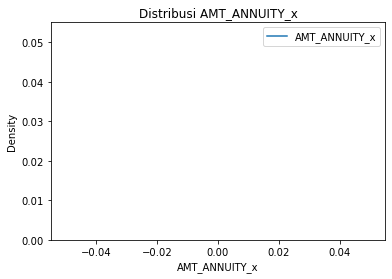

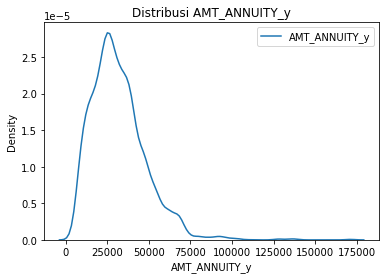

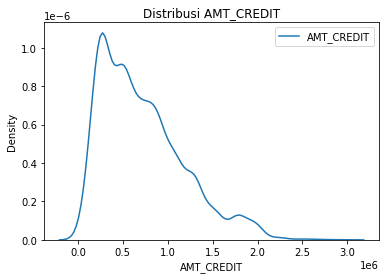

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


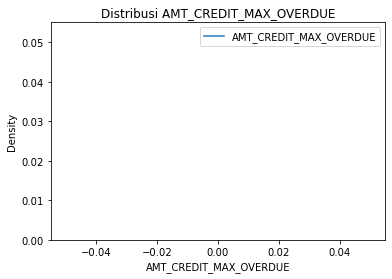

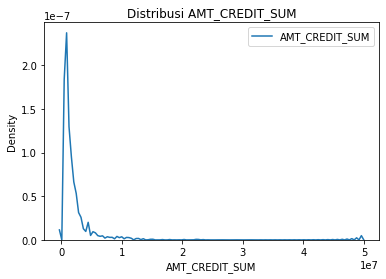

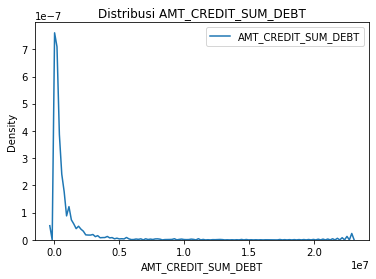

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


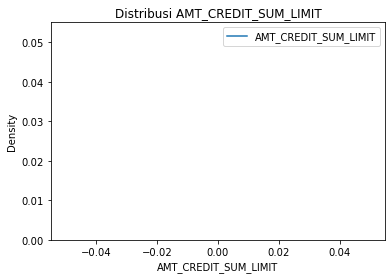

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


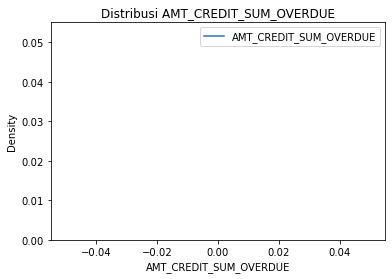

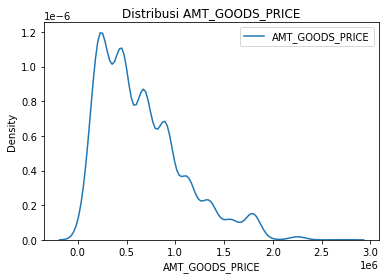

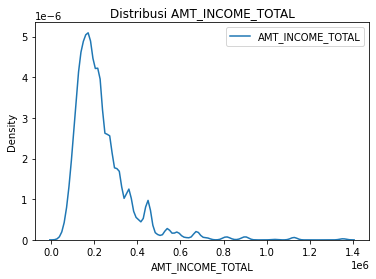

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


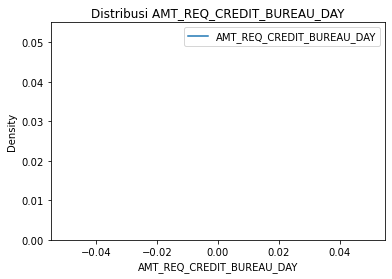

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


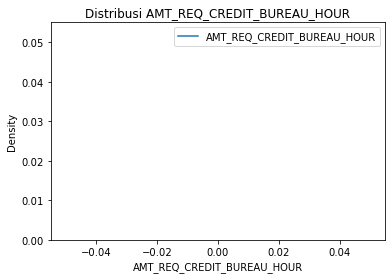

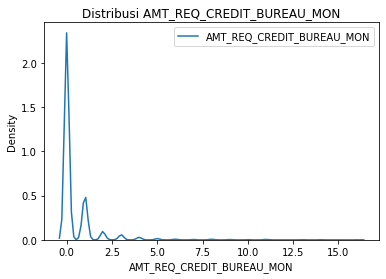

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


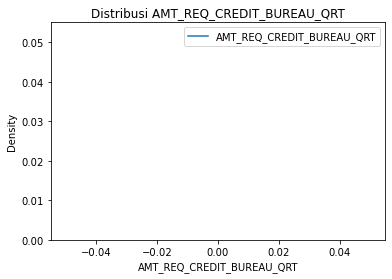

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


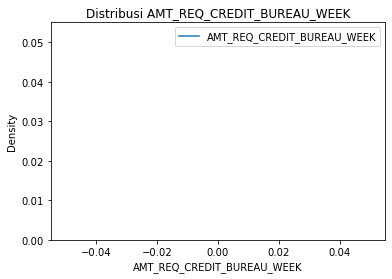

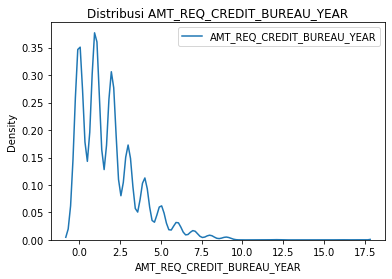

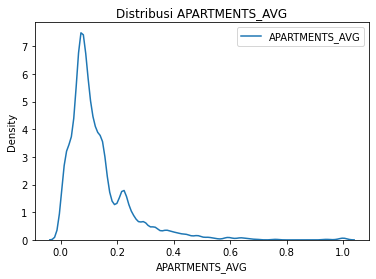

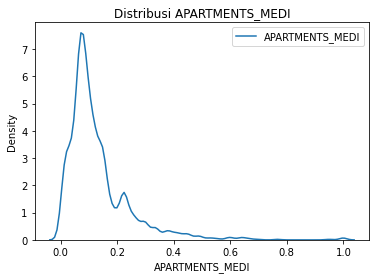

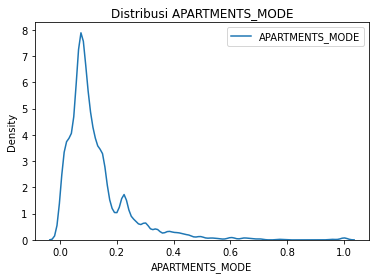

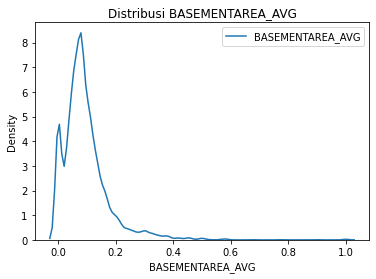

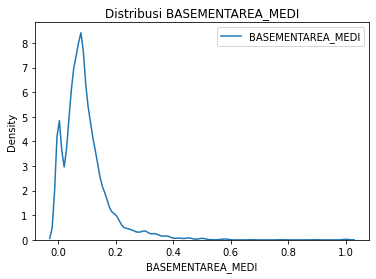

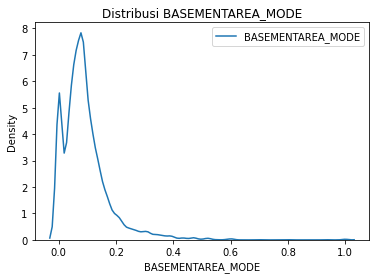

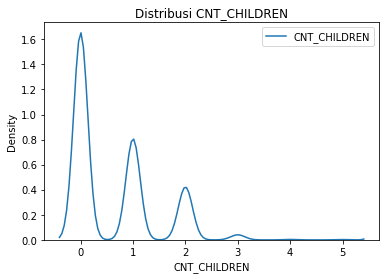

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


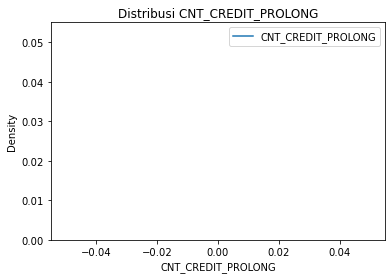

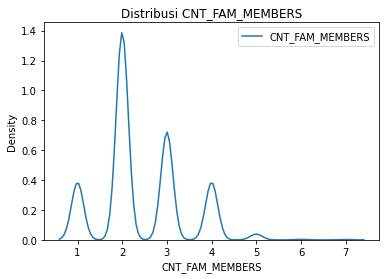

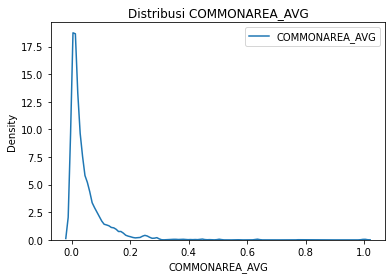

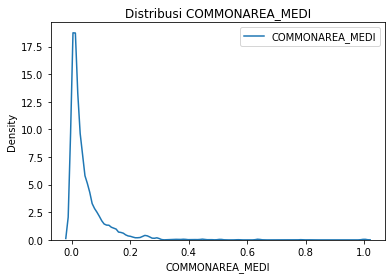

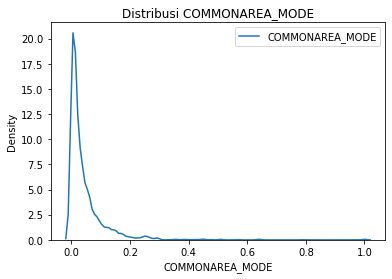

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


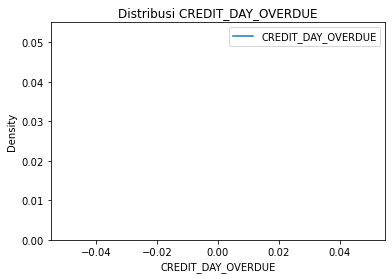

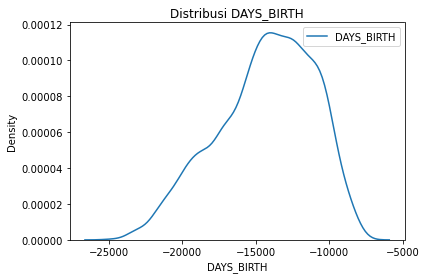

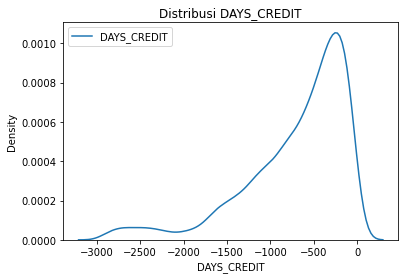

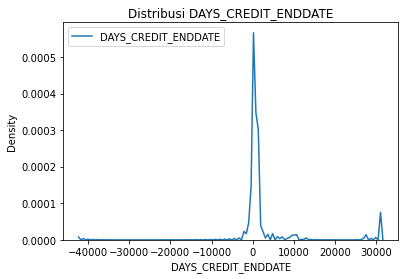

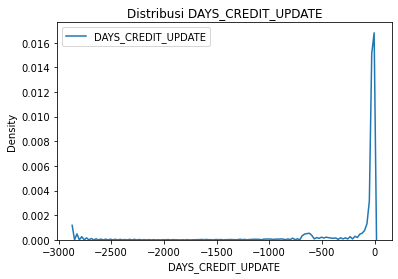

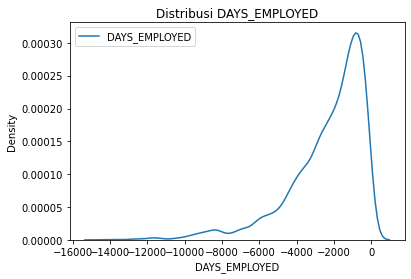

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


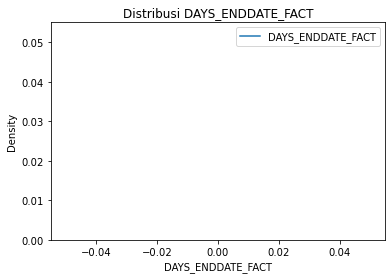

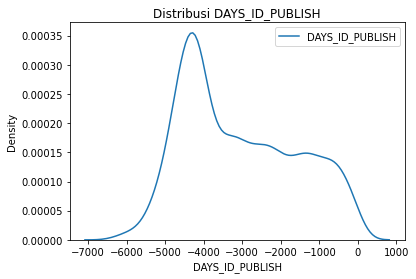

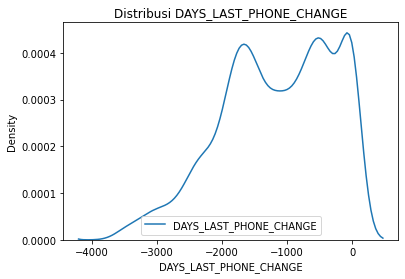

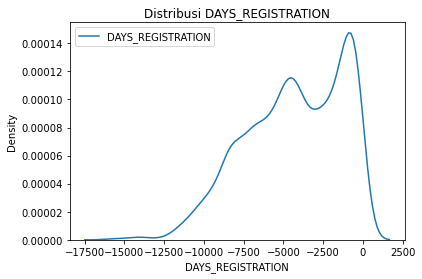

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


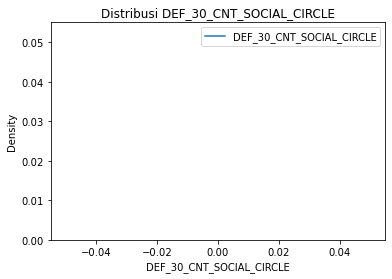

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


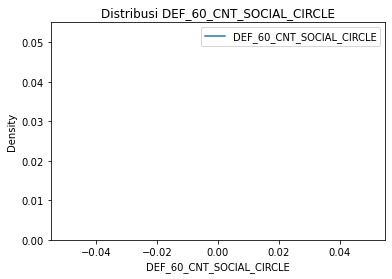

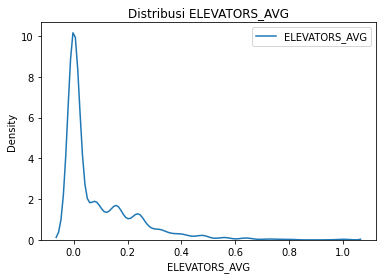

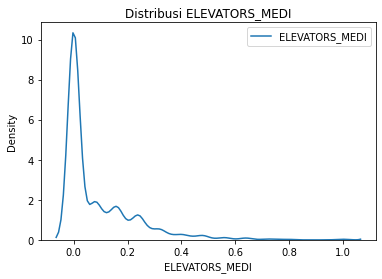

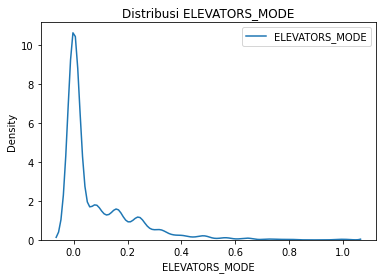

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


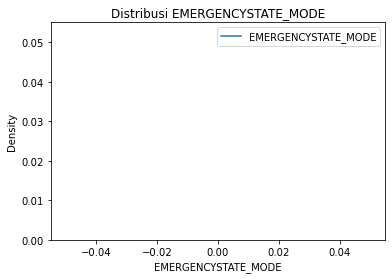

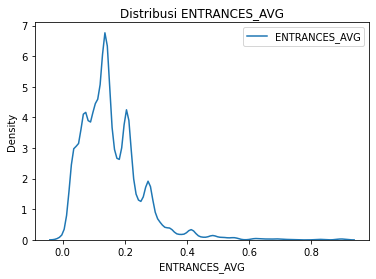

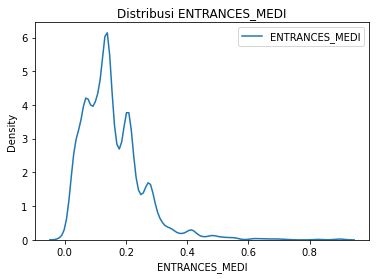

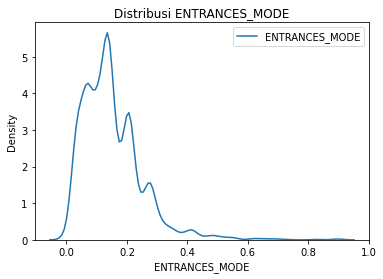

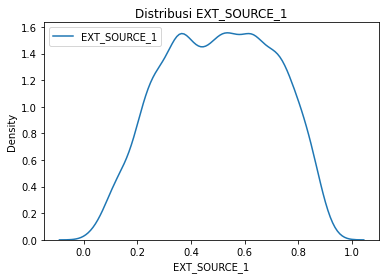

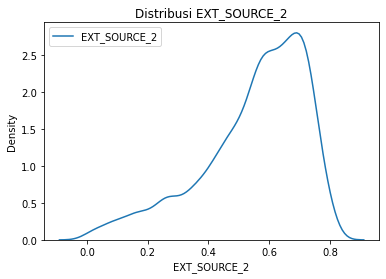

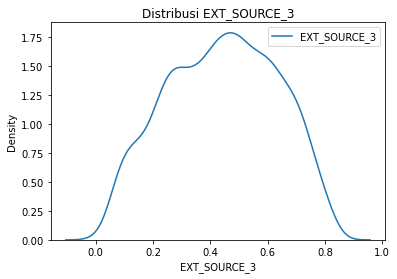

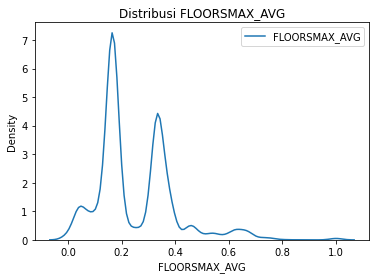

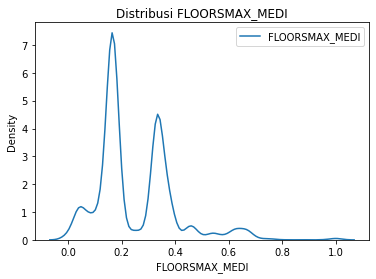

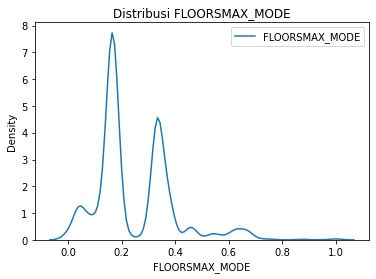

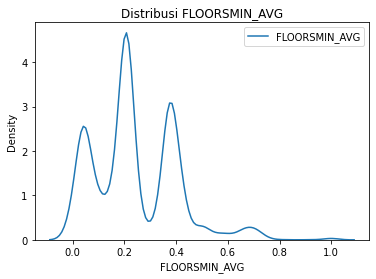

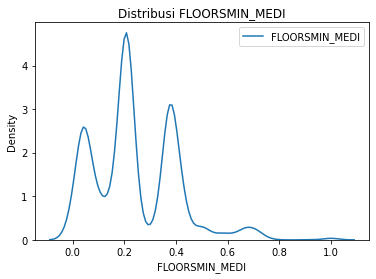

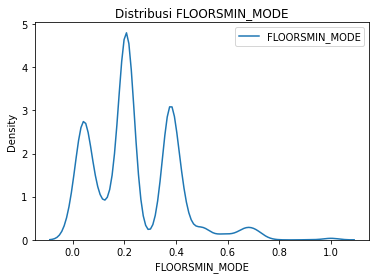

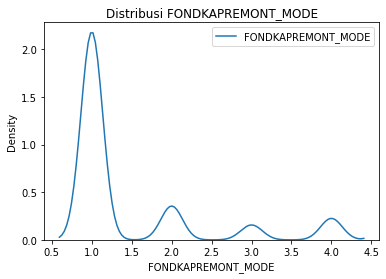

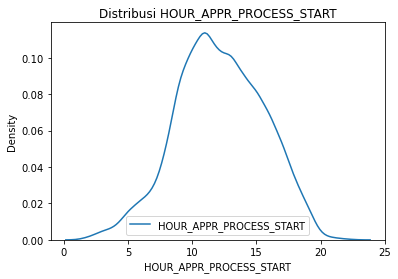

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


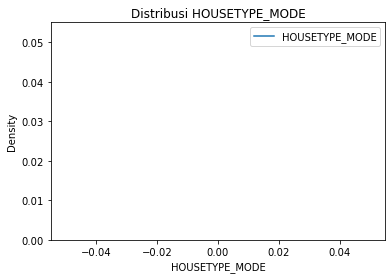

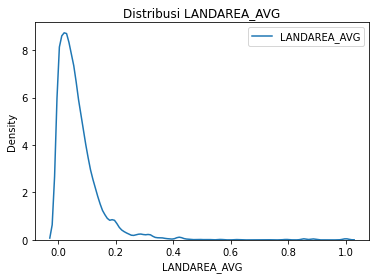

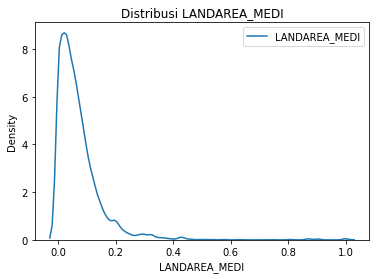

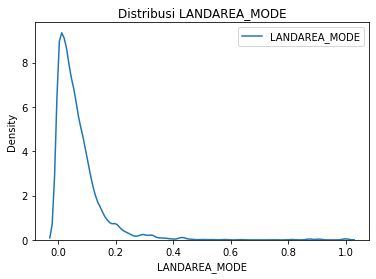

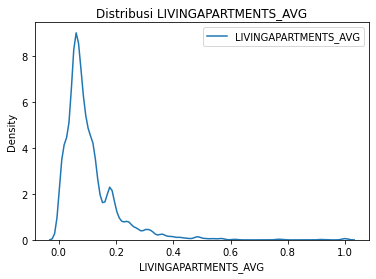

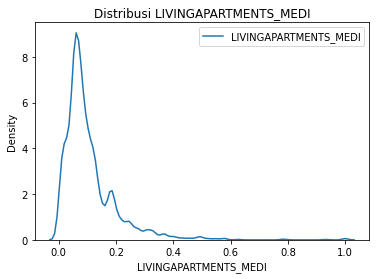

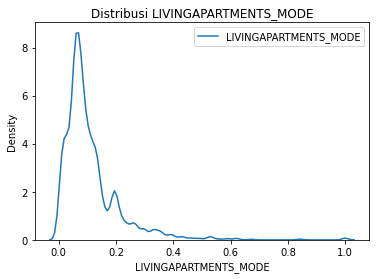

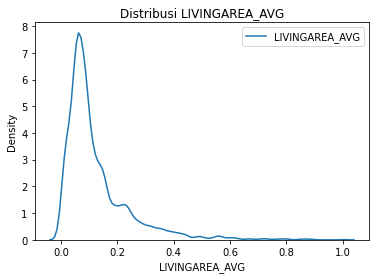

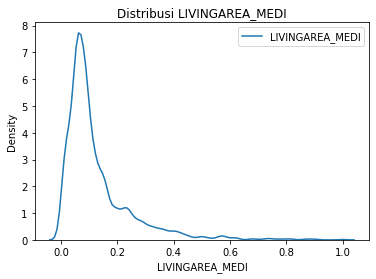

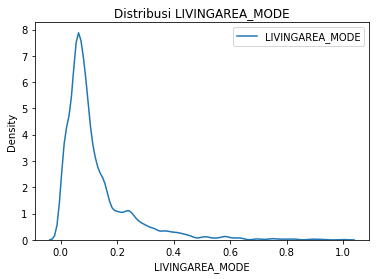

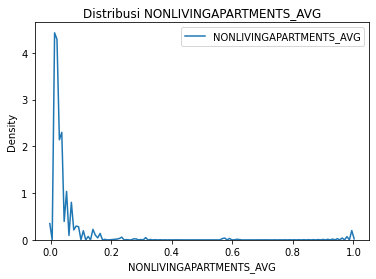

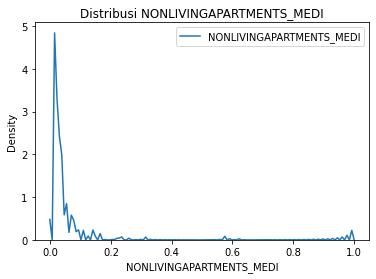

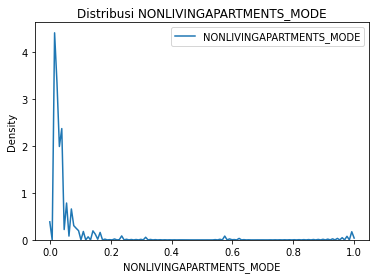

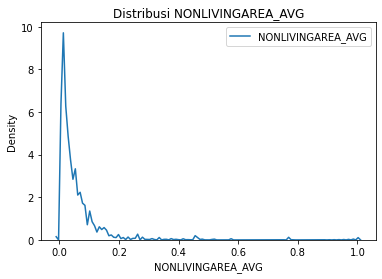

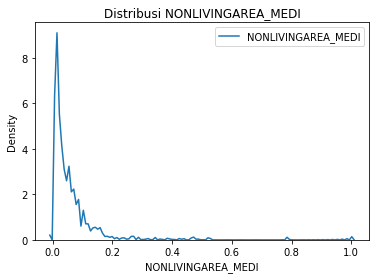

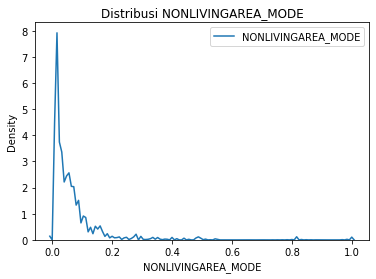

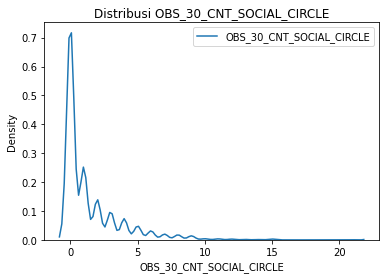

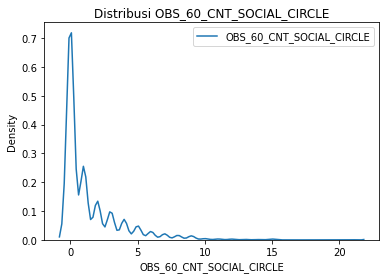

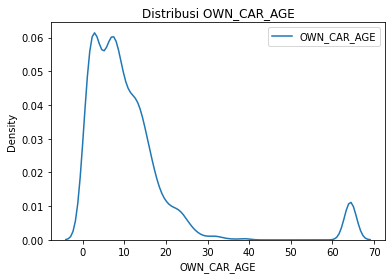

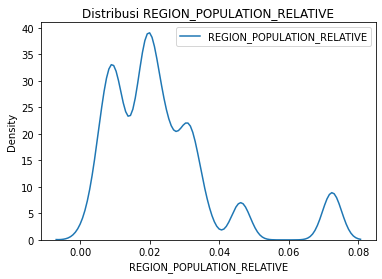

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


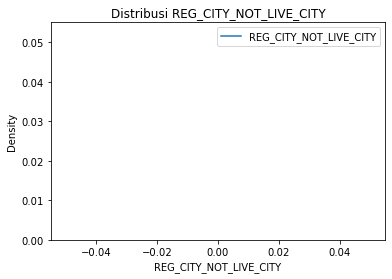

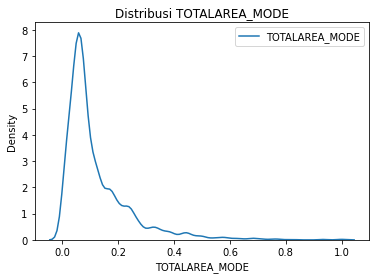

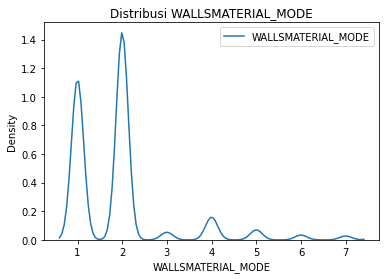

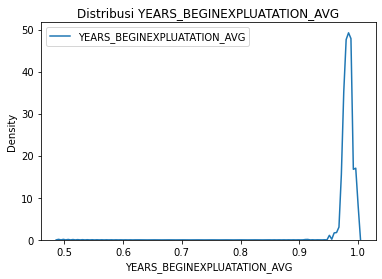

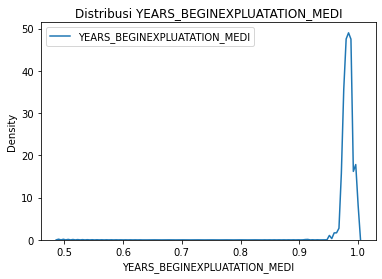

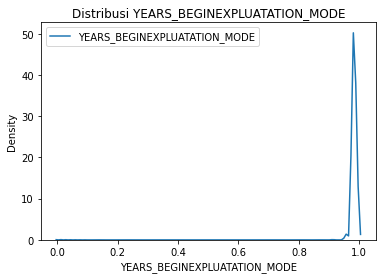

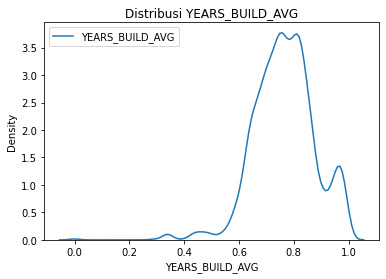

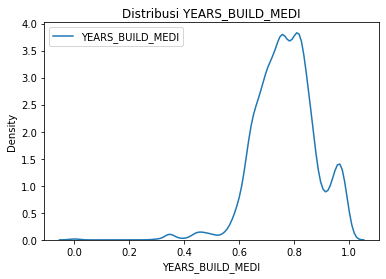

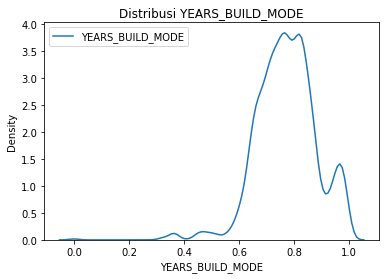

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


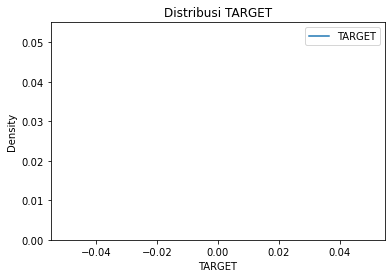

In [63]:
numeric_columns = list(merged_num.columns)

for column in numeric_columns:
  sns.kdeplot(merged_num[column])
  plt.title("Distribusi {}".format(column))
  plt.xlabel("{}".format(column))
  plt.ylabel("Density")
  plt.show()

Sebagian besar variabel prediktor tidak berdistribusi normal. Selanjutnya, semua variabel prediktor akan dicoba diubah menjadi berdistribusi normal baku.

In [64]:
scaler = StandardScaler()
X = merged_num.drop(columns='TARGET')
y = merged_num['TARGET']
std = scaler.fit(X)
X_std = std.transform(X)
X_std

array([[-0.13136725,  0.17774521,  1.0165698 , ..., -0.95535147,
        -0.95463406, -0.9102191 ],
       [-0.13136725,  0.17774521,  1.0165698 , ..., -0.95535147,
        -0.95463406, -0.9102191 ],
       [-0.13136725, -0.93111999, -0.88063106, ...,  0.02869862,
         0.02642195,  0.05432395],
       ...,
       [-0.13136725, -0.44056589, -0.45503975, ...,  0.95124557,
         0.94536269,  0.95800672],
       [-0.13136725, -0.44056589, -0.45503975, ...,  0.95124557,
         0.94536269,  0.95800672],
       [-0.13136725, -0.44056589, -0.45503975, ...,  0.95124557,
         0.94536269,  0.95800672]])

In [65]:
k_best = SelectKBest(score_func=f_regression, k=10)
fit = k_best.fit(X_std,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
featureScores.sort_values('Score', ascending=False)

Features       Score
49                  EXT_SOURCE_3  163.086808
47                  EXT_SOURCE_1  134.706754
48                  EXT_SOURCE_2  101.321427
33                 DAYS_EMPLOYED   34.279595
29                    DAYS_BIRTH   31.165332
10     AMT_REQ_CREDIT_BUREAU_DAY   21.835519
30                   DAYS_CREDIT   15.972259
3         AMT_CREDIT_MAX_OVERDUE   13.593906
9               AMT_INCOME_TOTAL   13.090126
79                TOTALAREA_MODE   10.069659
71             NONLIVINGAREA_AVG   10.011234
56            FONDKAPREMONT_MODE    9.213008
45                ENTRANCES_MEDI    8.905627
73            NONLIVINGAREA_MODE    8.722900
72            NONLIVINGAREA_MEDI    8.550443
44                 ENTRANCES_AVG    8.223477
46                ENTRANCES_MODE    8.206460
36        DAYS_LAST_PHONE_CHANGE    8.196263
22                  CNT_CHILDREN    7.749589
50                 FLOORSMAX_AVG    6.393682
24               CNT_FAM_MEMBERS    6.339822
78        REG_CITY_NOT_LIVE_CITY    6.339481
52                FLOORSMAX_MODE    6.325826
65                LIVINGAREA_AVG    6.214085
76                   OWN_CAR_AGE    6.212369
11    AMT_REQ_CREDIT_BUREAU_HOUR    6.121306
51                FLOORSMAX_MEDI    5.838659
66               LIVINGAREA_MEDI    5.517952
35               DAYS_ID_PUBLISH    5.434391
32            DAYS_CREDIT_UPDATE    5.236403
1                  AMT_ANNUITY_y    4.506681
16                APARTMENTS_AVG    4.200413
25                COMMONAREA_AVG    4.187013
17               APARTMENTS_MEDI    4.058909
26               COMMONAREA_MEDI    4.046353
67               LIVINGAREA_MODE    3.866151
84               YEARS_BUILD_AVG    3.787019
6           AMT_CREDIT_SUM_LIMIT    3.731239
27               COMMONAREA_MODE    3.719434
18               APARTMENTS_MODE    3.558087
42                ELEVATORS_MODE    3.380810
86              YEARS_BUILD_MODE    3.359817
85              YEARS_BUILD_MEDI    3.355671
62          LIVINGAPARTMENTS_AVG    3.103313
4                 AMT_CREDIT_SUM    3.088824
41                ELEVATORS_MEDI    2.890066
40                 ELEVATORS_AVG    2.870155
15    AMT_REQ_CREDIT_BUREAU_YEAR    2.637814
74      OBS_30_CNT_SOCIAL_CIRCLE    2.525570
64         LIVINGAPARTMENTS_MODE    2.499415
63         LIVINGAPARTMENTS_MEDI    2.490888
61                 LANDAREA_MODE    2.483683
31           DAYS_CREDIT_ENDDATE    2.472067
19              BASEMENTAREA_AVG    2.062171
60                 LANDAREA_MEDI    1.982045
59                  LANDAREA_AVG    1.962969
75      OBS_60_CNT_SOCIAL_CIRCLE    1.961792
23            CNT_CREDIT_PROLONG    1.919826
12     AMT_REQ_CREDIT_BUREAU_MON    1.607482
20             BASEMENTAREA_MEDI    1.573340
0                  AMT_ANNUITY_x    1.547918
37             DAYS_REGISTRATION    1.458720
34             DAYS_ENDDATE_FACT    1.418539
39      DEF_60_CNT_SOCIAL_CIRCLE    1.393912
38      DEF_30_CNT_SOCIAL_CIRCLE    1.186698
81   YEARS_BEGINEXPLUATATION_AVG    1.184217
77    REGION_POPULATION_RELATIVE    1.147197
82  YEARS_BEGINEXPLUATATION_MEDI    1.095161
8                AMT_GOODS_PRICE    1.072674
14    AMT_REQ_CREDIT_BUREAU_WEEK    1.023020
7         AMT_CREDIT_SUM_OVERDUE    0.784934
5            AMT_CREDIT_SUM_DEBT    0.772998
21             BASEMENTAREA_MODE    0.771457
57       HOUR_APPR_PROCESS_START    0.767564
43           EMERGENCYSTATE_MODE    0.524957
53                 FLOORSMIN_AVG    0.492753
13     AMT_REQ_CREDIT_BUREAU_QRT    0.417884
54                FLOORSMIN_MEDI    0.360861
83  YEARS_BEGINEXPLUATATION_MODE    0.359177
55                FLOORSMIN_MODE    0.287500
68       NONLIVINGAPARTMENTS_AVG    0.252461
2                     AMT_CREDIT    0.186074
69      NONLIVINGAPARTMENTS_MEDI    0.175851
70      NONLIVINGAPARTMENTS_MODE    0.163774
28            CREDIT_DAY_OVERDUE    0.057762
80            WALLSMATERIAL_MODE    0.041823
58                HOUSETYPE_MODE    0.001139

#Logistic Regression
Berdasarkan beberapa kali eksperimen, semakin banyak fitur yang digunakan, semakin baik performa model (semakin tinggi nilai R squared model logistic regression). Maka dalam hal ini, dicoba digunakan 10 fitur prediktor numerikal dan 10 fitur prediktor kategorikal yang digabungkan untuk memprediksi fitur target yaitu TARGET pada tabel application.

In [66]:
merged_enc = encoder.fit_transform(merged)
merged_enc.head()

SK_ID_CURR  SK_ID_BUREAU  CREDIT_CURRENCY  DAYS_CREDIT  \
2       189495       5715339                1         -128   
3       189495       5715340                1         -562   
16      193371       5717148                1         -351   
17      193371       5717149                1         -865   
18      193371       5717150                1          -70   

    CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
2                    0               1698.0                NaN   
3                    0              27481.0                NaN   
16                   0               -139.0                NaN   
17                   0                418.0                NaN   
18                   0                115.0                NaN   

    AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
2                      NaN                   0       3638817.0   
3                15406.065                   1        180000.0   
16                   0.000                   0         84825.0   
17                     NaN                   0         45000.0   
18                     NaN                   0         38205.0   

    AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
2           3566304.000                  0.00                     0.0   
3             50238.405             124655.67                     0.0   
16            51768.045                  0.00                     0.0   
17                0.000                  0.00                     0.0   
18            26365.500                  0.00                     0.0   

    CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY_x  TARGET  \
2             1                 -38            NaN       0   
3             2                 -45            NaN       0   
16            1                -155            NaN       0   
17            2                 -52            NaN       0   
18            1                  -7            NaN       0   

    NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
2                    1            1             1                1   
3                    1            1             1                1   
16                   1            1             1                1   
17                   1            1             1                1   
18                   1            1             1                1   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_y  \
2              0          382500.0   1185282.0        34785.0   
3              0          382500.0   1185282.0        34785.0   
16             1          180000.0    312768.0        16506.0   
17             1          180000.0    312768.0        16506.0   
18             1          180000.0    312768.0        16506.0   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
2         1035000.0                1                 3                    1   
3         1035000.0                1                 3                    1   
16         270000.0                1                 2                    1   
17         270000.0                1                 2                    1   
18         270000.0                1                 2                    1   

    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
2                    3                  1                    0.006233   
3                    3                  1                    0.006233   
16                   1                  1                    0.010276   
17                   1                  1                    0.010276   
18                   1                  1                    0.010276   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
2        -9589          -1831             -551.0            -2275   
3        -9589          -1831             -551.0            -2275   
16       -9182          -1802            -4007.0            -1868   
17       -9182         

In [67]:
merged_enc = merged_enc.fillna(0)
merged_enc.head()

SK_ID_CURR  SK_ID_BUREAU  CREDIT_CURRENCY  DAYS_CREDIT  \
2       189495       5715339                1         -128   
3       189495       5715340                1         -562   
16      193371       5717148                1         -351   
17      193371       5717149                1         -865   
18      193371       5717150                1          -70   

    CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
2                    0               1698.0                0.0   
3                    0              27481.0                0.0   
16                   0               -139.0                0.0   
17                   0                418.0                0.0   
18                   0                115.0                0.0   

    AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
2                    0.000                   0       3638817.0   
3                15406.065                   1        180000.0   
16                   0.000                   0         84825.0   
17                   0.000                   0         45000.0   
18                   0.000                   0         38205.0   

    AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
2           3566304.000                  0.00                     0.0   
3             50238.405             124655.67                     0.0   
16            51768.045                  0.00                     0.0   
17                0.000                  0.00                     0.0   
18            26365.500                  0.00                     0.0   

    CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY_x  TARGET  \
2             1                 -38            0.0       0   
3             2                 -45            0.0       0   
16            1                -155            0.0       0   
17            2                 -52            0.0       0   
18            1                  -7            0.0       0   

    NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
2                    1            1             1                1   
3                    1            1             1                1   
16                   1            1             1                1   
17                   1            1             1                1   
18                   1            1             1                1   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_y  \
2              0          382500.0   1185282.0        34785.0   
3              0          382500.0   1185282.0        34785.0   
16             1          180000.0    312768.0        16506.0   
17             1          180000.0    312768.0        16506.0   
18             1          180000.0    312768.0        16506.0   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
2         1035000.0                1                 3                    1   
3         1035000.0                1                 3                    1   
16         270000.0                1                 2                    1   
17         270000.0                1                 2                    1   
18         270000.0                1                 2                    1   

    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
2                    3                  1                    0.006233   
3                    3                  1                    0.006233   
16                   1                  1                    0.010276   
17                   1                  1                    0.010276   
18                   1                  1                    0.010276   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
2        -9589          -1831             -551.0            -2275   
3        -9589          -1831             -551.0            -2275   
16       -9182          -1802            -4007.0            -1868   
17       -9182         

In [68]:
merged_enc = merged_enc[['ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_WORK_PHONE', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_13', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'NAME_EDUCATION_TYPE', 'FLAG_DOCUMENT_5', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_REQ_CREDIT_BUREAU_DAY', 'DAYS_CREDIT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_INCOME_TOTAL', 'TOTALAREA_MODE', 'TARGET']]
merged_enc.head()

ORGANIZATION_TYPE  OCCUPATION_TYPE  NAME_FAMILY_STATUS  FLAG_WORK_PHONE  \
2                  26                2                   3                0   
3                  26                2                   3                0   
16                  1                6                   1                0   
17                  1                6                   1                0   
18                  1                6                   1                0   

    LIVE_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_13  REG_CITY_NOT_WORK_CITY  \
2                             0                 0                       0   
3                             0                 0                       0   
16                            0                 0                       0   
17                            0                 0                       0   
18                            0                 0                       0   

    FLAG_DOCUMENT_3  NAME_EDUCATION_TYPE  FLAG_DOCUMENT_5  EXT_SOURCE_3  \
2                 0                    1                0      0.513694   
3                 0                    1                0      0.513694   
16                1                    1                0      0.474051   
17                1                    1                0      0.474051   
18                1                    1                0      0.474051   

    EXT_SOURCE_1  EXT_SOURCE_2  DAYS_EMPLOYED  DAYS_BIRTH  \
2       0.364862      0.495661          -1831       -9589   
3       0.364862      0.495661          -1831       -9589   
16      0.226598      0.579371          -1802       -9182   
17      0.226598      0.579371          -1802       -9182   
18      0.226598      0.579371          -1802       -9182   

    AMT_REQ_CREDIT_BUREAU_DAY  DAYS_CREDIT  AMT_CREDIT_MAX_OVERDUE  \
2                         0.0         -128                   0.000   
3                         0.0         -562               15406.065   
16                        0.0         -351                   0.000   
17                        0.0         -865                   0.000   
18                        0.0          -70                   0.000   

    AMT_INCOME_TOTAL  TOTALAREA_MODE  TARGET  
2           382500.0          0.0430       0  
3           382500.0          0.0430       0  
16          180000.0          0.0823       0  
17          180000.0          0.0823       0  
18          180000.0          0.0823       0

In [69]:
std = scaler.fit(merged_enc.iloc[:,10:20])
merged_enc.iloc[:,10:20] = std.transform(merged_enc.iloc[:,10:20])
merged_enc.head()

ORGANIZATION_TYPE  OCCUPATION_TYPE  NAME_FAMILY_STATUS  FLAG_WORK_PHONE  \
2                  26                2                   3                0   
3                  26                2                   3                0   
16                  1                6                   1                0   
17                  1                6                   1                0   
18                  1                6                   1                0   

    LIVE_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_13  REG_CITY_NOT_WORK_CITY  \
2                             0                 0                       0   
3                             0                 0                       0   
16                            0                 0                       0   
17                            0                 0                       0   
18                            0                 0                       0   

    FLAG_DOCUMENT_3  NAME_EDUCATION_TYPE  FLAG_DOCUMENT_5  EXT_SOURCE_3  \
2                 0                    1                0      0.378514   
3                 0                    1                0      0.378514   
16                1                    1                0      0.171470   
17                1                    1                0      0.171470   
18                1                    1                0      0.171470   

    EXT_SOURCE_1  EXT_SOURCE_2  DAYS_EMPLOYED  DAYS_BIRTH  \
2      -0.683712     -0.314033       0.256258    1.439037   
3      -0.683712     -0.314033       0.256258    1.439037   
16     -1.363653      0.169589       0.270252    1.562429   
17     -1.363653      0.169589       0.270252    1.562429   
18     -1.363653      0.169589       0.270252    1.562429   

    AMT_REQ_CREDIT_BUREAU_DAY  DAYS_CREDIT  AMT_CREDIT_MAX_OVERDUE  \
2                   -0.071681     0.960604               -0.127636   
3                   -0.071681     0.243619                1.211758   
16                  -0.071681     0.592199               -0.127636   
17                  -0.071681    -0.256948               -0.127636   
18                  -0.071681     1.056422               -0.127636   

    AMT_INCOME_TOTAL  TOTALAREA_MODE  TARGET  
2           1.082850       -0.657436       0  
3           1.082850       -0.657436       0  
16         -0.413607       -0.331436       0  
17         -0.413607       -0.331436       0  
18         -0.413607       -0.331436       0

In [70]:
# Regresi Logistik dengan statsmodel

mod = smf.logit(formula='TARGET ~ ORGANIZATION_TYPE + OCCUPATION_TYPE + NAME_FAMILY_STATUS + FLAG_WORK_PHONE + LIVE_REGION_NOT_WORK_REGION + FLAG_DOCUMENT_13 + REG_CITY_NOT_WORK_CITY + FLAG_DOCUMENT_3 + NAME_EDUCATION_TYPE + FLAG_DOCUMENT_5 + EXT_SOURCE_3 + EXT_SOURCE_1 + EXT_SOURCE_2 + DAYS_EMPLOYED + DAYS_BIRTH + AMT_REQ_CREDIT_BUREAU_DAY + DAYS_CREDIT + AMT_CREDIT_MAX_OVERDUE + AMT_INCOME_TOTAL + TOTALAREA_MODE', data=merged_enc)
res = mod.fit()
print(res.summary())

         Current function value: 0.231897
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                 6612
Model:                          Logit   Df Residuals:                     6591
Method:                           MLE   Df Model:                           20
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                  0.1156
Time:                        20:33:31   Log-Likelihood:                -1533.3
converged:                      False   LL-Null:                       -1733.8
Covariance Type:            nonrobust   LLR p-value:                 1.250e-72
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.7244      0.192    -14.189      0.000      -3.101      -2.348
ORGANIZATION_T

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [71]:
# Regresi Logistic dengan scikit learn

X = merged_enc.drop(columns='TARGET')
y = merged_enc['TARGET']

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=2233) 
y_train.value_counts()

0    4890
1     399
Name: TARGET, dtype: int64

In [72]:
#Dilakukan oversampling untuk kelas 1 karena jumlah kelas 0 dan 1 yang tidak seimbang
sm = SMOTE(sampling_strategy={0:4890,1:4890},random_state=42,k_neighbors=1)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [73]:
#Model Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)
print("Nilai koefisien intercept : ",model.intercept_[0])
pd.DataFrame({"variabel":X.columns,"koefisien":model.coef_[0]})

Nilai koefisien intercept :  0.3212991594270508


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


variabel  koefisien
0             ORGANIZATION_TYPE  -0.011937
1               OCCUPATION_TYPE  -0.061731
2            NAME_FAMILY_STATUS   0.043300
3               FLAG_WORK_PHONE   0.260003
4   LIVE_REGION_NOT_WORK_REGION   0.400422
5              FLAG_DOCUMENT_13  -1.920780
6        REG_CITY_NOT_WORK_CITY  -0.308204
7               FLAG_DOCUMENT_3   0.241216
8           NAME_EDUCATION_TYPE  -0.404368
9               FLAG_DOCUMENT_5  -1.470680
10                 EXT_SOURCE_3  -0.561864
11                 EXT_SOURCE_1  -0.379317
12                 EXT_SOURCE_2  -0.241921
13                DAYS_EMPLOYED   0.222919
14                   DAYS_BIRTH  -0.001123
15    AMT_REQ_CREDIT_BUREAU_DAY   0.153319
16                  DAYS_CREDIT   0.175660
17       AMT_CREDIT_MAX_OVERDUE  -0.001508
18             AMT_INCOME_TOTAL  -0.168291
19               TOTALAREA_MODE  -0.022149

In [74]:
y_train = pd.DataFrame(y_train)
y_train[0].value_counts()

1    4890
0    4890
Name: 0, dtype: int64

In [75]:
model.predict_proba(X_train)

array([[0.3921887 , 0.6078113 ],
       [0.82932881, 0.17067119],
       [0.87023473, 0.12976527],
       ...,
       [0.15661984, 0.84338016],
       [0.48967977, 0.51032023],
       [0.53331337, 0.46668663]])

In [76]:
threshold = 0.5
prediksi = (model.predict_proba(X_train)[:,1]>threshold).astype(int)
prediksi

array([1, 0, 0, ..., 1, 1, 0])

In [77]:
unique_values, value_counts = np.unique(prediksi, return_counts=True)
unique_values

array([0, 1])

In [78]:
prediksi_train = model.predict_proba(X_train)
prediksi_test = model.predict_proba(X_test)

threshold = 0.5
prediksi_train = (prediksi_train[:,1]>threshold).astype(int) 
prediksi_test = (prediksi_test[:,1]>threshold).astype(int)

In [79]:
def confusion_matrix(actual,prediction):
    return pd.crosstab(pd.Series(actual,name="Actual").reset_index(drop=True),pd.Series(prediction,name="Prediction").reset_index(drop=True))
    
confusion_matrix(y_train[0],prediksi_train)

Prediction     0     1
Actual                
0           3328  1562
1           1485  3405

In [80]:
prediksi_test

array([0, 1, 0, ..., 1, 1, 1])

In [81]:
confusion_matrix(y_test,prediksi_test)

Prediction    0    1
Actual              
0           841  396
1            26   60

In [82]:
print(classification_report(y_train, prediksi_train))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      4890
           1       0.69      0.70      0.69      4890

    accuracy                           0.69      9780
   macro avg       0.69      0.69      0.69      9780
weighted avg       0.69      0.69      0.69      9780



Pada classification report untuk data train, nilai recall dan precision untuk credit score 1 tidak jauh berbeda, dan nilainya cukup baik.

In [83]:
print(classification_report(y_test, prediksi_test))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1237
           1       0.13      0.70      0.22        86

    accuracy                           0.68      1323
   macro avg       0.55      0.69      0.51      1323
weighted avg       0.92      0.68      0.76      1323



Pada classification report untuk data test, nilai recall jauh lebih tinggi daripada nilai precision untuk credit score 1.

In [84]:
X = merged_enc.drop(columns='TARGET')
y = merged_enc['TARGET']

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=2233) 

sm = SMOTE(sampling_strategy={0:4890,1:4890},random_state=42,k_neighbors=1)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [85]:
#KNN

model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train,y_train)
prediksi_train = model.predict(X_train)
prediksi_test = model.predict(X_test)

In [86]:
confusion_matrix(y_train,prediksi_train)

Prediction   0.0   1.0
Actual                
0           4890     0
1              0  4890

In [87]:
print(classification_report(y_train, prediksi_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4890
           1       1.00      1.00      1.00      4890

    accuracy                           1.00      9780
   macro avg       1.00      1.00      1.00      9780
weighted avg       1.00      1.00      1.00      9780



In [88]:
confusion_matrix(y_test, prediksi_test)

Prediction   0.0  1.0
Actual               
0           1217   20
1             14   72

In [89]:
print(classification_report(y_test, prediksi_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1237
           1       0.78      0.84      0.81        86

    accuracy                           0.97      1323
   macro avg       0.89      0.91      0.90      1323
weighted avg       0.98      0.97      0.97      1323



Pada classification report untuk data test, nilai recall untuk credit score 1 cukup tinggi dan nilai recall nya lebih tinggi dari nilai precision.

Sehingga, dapat disimpulkan bahwa model K-Nearest Neighbor memberikan nilai recall untuk credit score 1 lebih baik daripada model Logistic Regression.

#PREDIKSI UNTUK DATA TEST DENGAN MODEL K-NEAREST NEIGHBOR

Selanjutnya, akan dicoba menggunakan model K-Nearest Neighbor untuk memprediksi credit score client pada data application_test.csv

In [141]:
merged_test_enc_copy = merged_test_enc.copy()

In [142]:
merged_test_enc_copy = merged_test_enc_copy[['SK_ID_CURR','ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_WORK_PHONE', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_13', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'NAME_EDUCATION_TYPE', 'FLAG_DOCUMENT_5', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_REQ_CREDIT_BUREAU_DAY', 'DAYS_CREDIT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_INCOME_TOTAL', 'TOTALAREA_MODE']]
merged_test_enc_copy = merged_test_enc_copy.sort_values('SK_ID_CURR', ascending = True)
merged_test_enc_copy.head()

SK_ID_CURR  ORGANIZATION_TYPE  OCCUPATION_TYPE  NAME_FAMILY_STATUS  \
59595      100001                  1                1                   1   
59593      100001                  1                1                   1   
59592      100001                  1                1                   1   
59596      100001                  1                1                   1   
59598      100001                  1                1                   1   

       FLAG_WORK_PHONE  LIVE_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_13  \
59595                0                            0                 0   
59593                0                            0                 0   
59592                0                            0                 0   
59596                0                            0                 0   
59598                0                            0                 0   

       REG_CITY_NOT_WORK_CITY  FLAG_DOCUMENT_3  NAME_EDUCATION_TYPE  \
59595                       0                1                    1   
59593                       0                1                    1   
59592                       0                1                    1   
59596                       0                1                    1   
59598                       0                1                    1   

       FLAG_DOCUMENT_5  EXT_SOURCE_3  EXT_SOURCE_1  EXT_SOURCE_2  \
59595                0       0.15952      0.752614      0.789654   
59593                0       0.15952      0.752614      0.789654   
59592                0       0.15952      0.752614      0.789654   
59596                0       0.15952      0.752614      0.789654   
59598                0       0.15952      0.752614      0.789654   

       DAYS_EMPLOYED  DAYS_BIRTH  AMT_REQ_CREDIT_BUREAU_DAY  DAYS_CREDIT  \
59595          -2329      -19241                        0.0      -1572.0   
59593          -2329      -19241                        0.0       -909.0   
59592          -2329      -19241                        0.0       -857.0   
59596          -2329      -19241                        0.0       -559.0   
59598          -2329      -19241                        0.0       -320.0   

       AMT_CREDIT_MAX_OVERDUE  AMT_INCOME_TOTAL  TOTALAREA_MODE  
59595                     0.0          135000.0          0.0392  
59593                     0.0          135000.0          0.0392  
59592                     0.0          135000.0          0.0392  
59596                     0.0          135000.0          0.0392  
59598                     0.0          135000.0          0.0392

In [143]:
merged_test_enc_copy.iloc[:,11:21] = std.transform(merged_test_enc_copy.iloc[:,11:21])
merged_test_enc_copy.head()

SK_ID_CURR  ORGANIZATION_TYPE  OCCUPATION_TYPE  NAME_FAMILY_STATUS  \
59595      100001                  1                1                   1   
59593      100001                  1                1                   1   
59592      100001                  1                1                   1   
59596      100001                  1                1                   1   
59598      100001                  1                1                   1   

       FLAG_WORK_PHONE  LIVE_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_13  \
59595                0                            0                 0   
59593                0                            0                 0   
59592                0                            0                 0   
59596                0                            0                 0   
59598                0                            0                 0   

       REG_CITY_NOT_WORK_CITY  FLAG_DOCUMENT_3  NAME_EDUCATION_TYPE  \
59595                       0                1                    1   
59593                       0                1                    1   
59592                       0                1                    1   
59596                       0                1                    1   
59598                       0                1                    1   

       FLAG_DOCUMENT_5  EXT_SOURCE_3  EXT_SOURCE_1  EXT_SOURCE_2  \
59595                0     -1.471262      1.223145      1.384467   
59593                0     -1.471262      1.223145      1.384467   
59592                0     -1.471262      1.223145      1.384467   
59596                0     -1.471262      1.223145      1.384467   
59598                0     -1.471262      1.223145      1.384467   

       DAYS_EMPLOYED  DAYS_BIRTH  AMT_REQ_CREDIT_BUREAU_DAY  DAYS_CREDIT  \
59595        0.01595   -1.487197                  -0.071681    -1.424938   
59593        0.01595   -1.487197                  -0.071681    -0.329637   
59592        0.01595   -1.487197                  -0.071681    -0.243731   
59596        0.01595   -1.487197                  -0.071681     0.248576   
59598        0.01595   -1.487197                  -0.071681     0.643412   

       AMT_CREDIT_MAX_OVERDUE  AMT_INCOME_TOTAL  TOTALAREA_MODE  
59595               -0.127636         -0.746153       -0.688958  
59593               -0.127636         -0.746153       -0.688958  
59592               -0.127636         -0.746153       -0.688958  
59596               -0.127636         -0.746153       -0.688958  
59598               -0.127636         -0.746153       -0.688958

In [144]:
X_test = merged_test_enc_copy.drop(columns='SK_ID_CURR')
prediksi_test = model.predict(X_test)
prediksi_test = pd.DataFrame(prediksi_test)
prediksi_test['SK_ID_CURR'] = merged_test_enc_copy['SK_ID_CURR']
prediksi_test = prediksi_test.drop_duplicates(subset='SK_ID_CURR')
prediksi_test.head()

0  SK_ID_CURR
0   0.0      261883
7   0.0      430676
11  0.0      106514
22  0.0      106090
23  0.0      432156

In [145]:
prediksi_test = prediksi_test.sort_values('SK_ID_CURR', ascending=True)
new_name = 'TARGET'
prediksi_test = prediksi_test.rename(columns={0: new_name})
prediksi_test.head()

TARGET  SK_ID_CURR
59592      0.0      100001
227594     0.0      100005
66153      0.0      100013
149471     0.0      100028
251103     0.0      100038

In [146]:
prediksi_test = prediksi_test[['SK_ID_CURR','TARGET']]
prediksi_test.head()

SK_ID_CURR  TARGET
59592       100001     0.0
227594      100005     0.0
66153       100013     0.0
149471      100028     0.0
251103      100038     0.0

In [147]:
prediksi_test['TARGET'].value_counts()

0.0    40494
1.0     8250
Name: TARGET, dtype: int64

In [150]:
client_diff = prediksi_test.loc[prediksi_test['TARGET']==1]

perc_client_diff = (len(client_diff) / len(prediksi_test)) * 100
print("Persentase hasil prediksi client dengan credit score 1 :", perc_client_diff, "%")

Persentase hasil prediksi client dengan credit score 1 : 16.925160019694733 %


Sebanyak 16.92 % client pada data test diprediksi kesulitan membayar kembali pinjaman yang telah diberikan.

In [157]:
merging_data_test = pd.merge(app_test, prediksi_test, on='SK_ID_CURR', how='left')
merging_data_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2               0          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          0.0   
1      -18064          -4469            -9118.0            -1623          0.0   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          0.0   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                   0              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                   0              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [158]:
merging_data_test['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         48305
Revolving loans      439
Name: NAME_CONTRACT_TYPE, dtype: int64

In [159]:
pay_diff_test = merging_data_test.loc[merging_data_test['TARGET']==1]
pay_diff_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
8       100066         Cash loans           F            N               Y   
11      100090         Cash loans           F            N               Y   
23      100170         Cash loans           M            N               Y   
31      100232         Cash loans           F            N               N   
32      100241         Cash loans           F            N               N   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
8              0          315000.0    364896.0      28957.5         315000.0   
11             0          135000.0    261621.0      16848.0         216000.0   
23             1          337500.0   1313212.5      42493.5        1012500.0   
31             1          102150.0    335592.0      21577.5         265500.0   
32             0           67500.0    431280.0      17797.5         360000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
8    Unaccompanied         State servant               Higher education   
11   Unaccompanied               Working  Secondary / secondary special   
23   Unaccompanied  Commercial associate              Incomplete higher   
31   Unaccompanied               Working               Higher education   
32   Unaccompanied               Working  Secondary / secondary special   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
8             Married  House / apartment                    0.046220   
11              Widow  House / apartment                    0.008019   
23            Married  House / apartment                    0.024610   
31            Married  House / apartment                    0.004960   
32            Married   Rented apartment                    0.015221   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
8       -12744          -1013            -1686.0            -3171   
11      -15524          -3555            -7833.0            -3985   
23      -11948          -1415            -5611.0            -4052   
31      -14445          -1751            -2204.0            -5049   
32       -9187           -270            -3663.0             -725   

    OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
8           0.0           1               1                0   
11          0.0           1               1                0   
23          0.0           1               1                0   
31          0.0           1               1                0   
32          0.0           1               1                1   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
8                  1           0           0      Core staff              2.0   
11                 1           0           0        Laborers              1.0   
23                 1           0           1        Laborers              3.0   
31                 1           0           0      Core staff              3.0   
32                 1           0           0        Laborers              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
8                      1                            1   
11                     2                            2   
23                     2                            2   
31                     2                            2   
32                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
8                    THURSDAY                       18   
11                     FRIDAY                       17   
23                    TUESDAY                       11   
31                   THURSDAY                       15   
32                     FRIDAY                       14   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
8                            0                           0   
11                           0                           0   
23   

In [160]:
pay_diff_test['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         8174
Revolving loans      76
Name: NAME_CONTRACT_TYPE, dtype: int64

In [161]:
cash_loan_diff_test = pay_diff_test.loc[pay_diff_test['NAME_CONTRACT_TYPE']=="Cash loans"]
cash_loan_test = merging_data_test.loc[merging_data_test['NAME_CONTRACT_TYPE']=="Cash loans"]
perc_cash_loans_test = (len(cash_loan_diff_test) / len(cash_loan_test)) * 100
perc_cash_loans_test

16.92164372218197

In [162]:
rev_loan_diff_test = pay_diff_test.loc[pay_diff_test['NAME_CONTRACT_TYPE']=="Revolving loans"]
rev_loan_test = merging_data_test.loc[merging_data_test['NAME_CONTRACT_TYPE']=="Revolving loans"]
perc_rev_loans_test = (len(rev_loan_diff_test) / len(rev_loan_test)) * 100
perc_rev_loans_test

17.312072892938495

Berdasarkan hasil prediksi pada data test, persentase orang yang mengajukan "Revolving loans" yang kesulitan membayar kembali sedikit lebih tinggi daripada persentase orang yang mengajukan "Cash loans" yang kesulitan membayar kembali. Hal ini menunjukkan perbedaan dengan hasil observasi pada data train.

In [201]:
bin_data_test = cash_loan_diff_test[['AMT_CREDIT']]
bin_data_test['AMT_CREDIT_BIN'] = pd.cut(cash_loan_diff_test['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],
                              labels=['Below 100k', '100k - 500k', '500k - 1mil',
                                      '1mil - 3mil', '3mil - 5mil'])

bin_data_test.head()

<ipython-input-201-b4bae9c4f5b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data_test['AMT_CREDIT_BIN'] = pd.cut(cash_loan_diff_test['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],


AMT_CREDIT AMT_CREDIT_BIN
8     364896.0    100k - 500k
11    261621.0    100k - 500k
23   1313212.5    1mil - 3mil
31    335592.0    100k - 500k
32    431280.0    100k - 500k

In [202]:
bin_data_test['AMT_CREDIT_BIN'].value_counts()

100k - 500k    4415
500k - 1mil    2695
1mil - 3mil     800
Below 100k      264
3mil - 5mil       0
Name: AMT_CREDIT_BIN, dtype: int64

In [203]:
bin_data_rev_test = rev_loan_diff_test[['AMT_CREDIT']]
bin_data_rev_test['AMT_CREDIT_BIN'] = pd.cut(rev_loan_diff_test['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],
                              labels=['Below 100k', '100k - 500k', '500k - 1mil',
                                      '1mil - 3mil', '3mil - 5mil'])
bin_data_rev_test.head()

<ipython-input-203-709131031873>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data_rev_test['AMT_CREDIT_BIN'] = pd.cut(rev_loan_diff_test['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],


AMT_CREDIT AMT_CREDIT_BIN
1946    202500.0    100k - 500k
2052    225000.0    100k - 500k
2580    180000.0    100k - 500k
3264    135000.0    100k - 500k
3708    810000.0    500k - 1mil

In [204]:
bin_data_rev_test['AMT_CREDIT_BIN'].value_counts()

100k - 500k    65
500k - 1mil     8
1mil - 3mil     3
3mil - 5mil     0
Below 100k      0
Name: AMT_CREDIT_BIN, dtype: int64

In [205]:
bin_data_cash_loan_test = cash_loan_test[['AMT_CREDIT']]
bin_data_cash_loan_test['AMT_CREDIT_BIN'] = pd.cut(cash_loan_test['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],
                              labels=['Below 100k', '100k - 500k', '500k - 1mil',
                                      '1mil - 3mil', '3mil - 5mil'])
bin_data_cash_loan_test.head()

<ipython-input-205-8d4b6f57d7f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data_cash_loan_test['AMT_CREDIT_BIN'] = pd.cut(cash_loan_test['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],


AMT_CREDIT AMT_CREDIT_BIN
0    568800.0    500k - 1mil
1    222768.0    100k - 500k
2    663264.0    500k - 1mil
3   1575000.0    1mil - 3mil
4    625500.0    500k - 1mil

In [206]:
bin_data_rev_loan_test = rev_loan_test[['AMT_CREDIT']]
bin_data_rev_loan_test['AMT_CREDIT_BIN'] = pd.cut(rev_loan_test['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],
                              labels=['Below 100k', '100k - 500k', '500k - 1mil',
                                      '1mil - 3mil', '3mil - 5mil'])

bin_data_rev_loan_test.head()

<ipython-input-206-ca529a52768b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data_rev_loan_test['AMT_CREDIT_BIN'] = pd.cut(rev_loan_test['AMT_CREDIT'], bins=[0,100000,500000,1000000,3000000,5000000],


AMT_CREDIT AMT_CREDIT_BIN
14     157500.0    100k - 500k
233    135000.0    100k - 500k
429    270000.0    100k - 500k
566    135000.0    100k - 500k
925    270000.0    100k - 500k

In [207]:
bin_data_cash_loan_test['AMT_CREDIT_BIN'].value_counts()

100k - 500k    26389
500k - 1mil    15678
1mil - 3mil     4565
Below 100k      1673
3mil - 5mil        0
Name: AMT_CREDIT_BIN, dtype: int64

In [208]:
bin_data_rev_loan_test['AMT_CREDIT_BIN'].value_counts()

100k - 500k    395
500k - 1mil     32
1mil - 3mil     12
3mil - 5mil      0
Below 100k       0
Name: AMT_CREDIT_BIN, dtype: int64

Client dengan tipe pinjaman Cash Loan yang kesulitan membayar

In [209]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah kurang dari Rp 100.000
bin1_test = bin_data_test.loc[bin_data_test['AMT_CREDIT_BIN']=='Below 100k']
bin1_cash_loan_test = bin_data_cash_loan_test.loc[bin_data_cash_loan_test['AMT_CREDIT_BIN']=='Below 100k']
perc_bin1_test = (len(bin1_test) / len(bin1_cash_loan_test)) * 100
perc_bin1_test

15.780035863717872

In [210]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah berkisar antara Rp 100.000 - Rp 500.000
bin2_test = bin_data_test.loc[bin_data_test['AMT_CREDIT_BIN']=='100k - 500k']
bin2_cash_loan_test = bin_data_cash_loan_test.loc[bin_data_cash_loan_test['AMT_CREDIT_BIN']=='100k - 500k']
perc_bin2_test = (len(bin2_test) / len(bin2_cash_loan_test)) * 100
perc_bin2_test

16.73045587176475

In [211]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah berkisar antara Rp 500.000 - Rp 1.000.000
bin3_test = bin_data_test.loc[bin_data_test['AMT_CREDIT_BIN']=='500k - 1mil']
bin3_cash_loan_test = bin_data_cash_loan_test.loc[bin_data_cash_loan_test['AMT_CREDIT_BIN']=='500k - 1mil']
perc_bin3_test = (len(bin3_test) / len(bin3_cash_loan_test)) * 100
perc_bin3_test

17.18969256282689

In [212]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Cash loan yang berjumlah berkisar antara Rp 1.000.000 - Rp 3.000.000
bin4_test = bin_data_test.loc[bin_data_test['AMT_CREDIT_BIN']=='1mil - 3mil']
bin4_cash_loan_test = bin_data_cash_loan_test.loc[bin_data_cash_loan_test['AMT_CREDIT_BIN']=='1mil - 3mil']
perc_bin4_test = (len(bin4_test) / len(bin4_cash_loan_test)) * 100
perc_bin4_test

17.524644030668128

Persentase orang yang kesulitan membayar dengan tipe pinjaman Revolving loan yang berjumlah kurang dari Rp 100.000 tidak ada karena tidak ada Client yang mengajukan pinjaman revolving kurang dari Rp 100.000

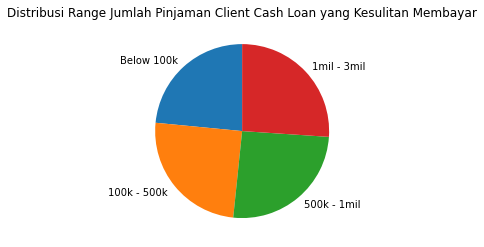

In [227]:
#Pie Chart Cash Loan
cash_diff = np.array([15.78, 16.73, 17.19, 17.52])
mylabels = ["Below 100k","100k - 500k", "500k - 1mil", "1mil - 3mil"]

plt.title("Distribusi Range Jumlah Pinjaman Client Cash Loan yang Kesulitan Membayar")
plt.pie(cash_diff, labels = mylabels, startangle = 90)
plt.show() 

Client dengan tipe pinjaman Revolving Loan yang kesulitan membayar

In [213]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Revolving loan yang berjumlah berkisar antara Rp 100.000 - Rp 500.000
bin2_rev_test = bin_data_rev_test.loc[bin_data_rev_test['AMT_CREDIT_BIN']=='100k - 500k']
bin2_rev_loan_test = bin_data_rev_loan_test.loc[bin_data_rev_loan_test['AMT_CREDIT_BIN']=='100k - 500k']
perc_bin2_rev_test = (len(bin2_rev_test) / len(bin2_rev_loan_test)) * 100
perc_bin2_rev_test

16.455696202531644

In [214]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Revolving loan yang berjumlah berkisar antara Rp 500.000 - Rp 1.000.000
bin3_rev_test = bin_data_rev_test.loc[bin_data_rev_test['AMT_CREDIT_BIN']=='500k - 1mil']
bin3_rev_loan_test = bin_data_rev_loan_test.loc[bin_data_rev_loan_test['AMT_CREDIT_BIN']=='500k - 1mil']
perc_bin3_rev_test = (len(bin3_rev_test) / len(bin3_rev_loan_test)) * 100
perc_bin3_rev_test

25.0

In [215]:
#Persentase orang yang kesulitan membayar dengan tipe pinjaman Revolving loan yang berjumlah berkisar antara Rp 1.000.000 - Rp 3.000.000
bin4_rev_test = bin_data_rev_test.loc[bin_data_rev_test['AMT_CREDIT_BIN']=='1mil - 3mil']
bin4_rev_loan_test = bin_data_rev_loan_test.loc[bin_data_rev_loan_test['AMT_CREDIT_BIN']=='1mil - 3mil']
perc_bin4_rev_test = (len(bin4_rev_test) / len(bin4_rev_loan_test)) * 100
perc_bin4_rev_test

25.0

Persentase orang yang kesulitan membayar dengan tipe pinjaman Revolving loan yang berjumlah berkisar antara Rp 3.000.000 - Rp 5.000.000 tidak ada karena tidak ada Client yang mengajukan pinjaman revolving berkisar antara Rp 3.000.000 - Rp 5.000.000

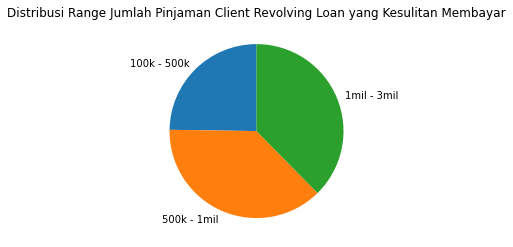

In [228]:
#Pie Chart Revolving Loan
rev_diff = np.array([16.46, 25, 25])
mylabels = ["100k - 500k", "500k - 1mil", "1mil - 3mil"]

plt.title("Distribusi Range Jumlah Pinjaman Client Revolving Loan yang Kesulitan Membayar")
plt.pie(rev_diff, labels = mylabels, startangle = 90)
plt.show() 